# Deep Learning Major Task
## CNN Leaf Classification

### First lets write our imports

In [53]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA



# Part I: Data Preparation
<a id="part-i"></a>

<h2>Taking a look and Describing the data</h2>
<a id="describe-data"></a>

### Training dataset

In [54]:
# Load the training set
train_df = pd.read_csv(r'.\data_files\train.csv')

print("#-----> First 5 rows of the training set:\n")
train_df.head(5)

#-----> First 5 rows of the training set:



id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 194 columns]

In [55]:
print("-----> training set description:")
train_df.describe()

-----> training set description:


id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.001953    0.000000    0.005859    0.000000    0.001953  ...   
50%      0.007812    0.015625    0.015625    0.000000    0.005859  ...   
75%      0.017578    0.056153    0.029297    0.000000    0.007812  ...   
max      0.111330    0.310550    0.091797    0.031250    0.076172  ...   

        texture55   texture56   texture57   texture58   texture59   texture60  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.036501    0.005024    0.015944    0.011586    0.016108    0.014017   
std      0.063403    0.019321    0.023214    0.025040    0.015335    0.060151   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000977    0.000000    0.004883    0.000000   
50%      0.004883    0.000000    0.005859    0.000977    0.012695    0.000000   
75%      0.043701    0.000000    0.022217    0.009766    0.021484    0.000000   
max      0.429690    0.202150    0.172850    0.200200    0.106450    0.578130   

        texture61   texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  990.000000  
mean     0.002688    0.020291    0.008989    0.019420  
std      0.011415    0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000977  
50%      0.000000    0.003906    0.002930    0.011719  
75%      0.000000    0.023438    0.012695    0.029297  
max      0.151370    0.375980    0.086914    0.141600  

[8 rows x 193 columns]

In [56]:
print("-----> training set information")
train_df.info()

-----> training set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [57]:
print("-----> training set value types")
train_df.dtypes

-----> training set value types


id             int64
species       object
margin1      float64
margin2      float64
margin3      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 194, dtype: object

### Testing dataset

In [58]:
# Load the testing set
test_df = pd.read_csv(r'.\data_files\test.csv')

print("#-----> First 5 rows of the testing set:")
test_df.head(5)

#-----> First 5 rows of the testing set:


id   margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0   4  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859   
1   7  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812   
2   9  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438   
3  12  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906   
4  13  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766   

   margin8   margin9  ...  texture55  texture56  texture57  texture58  \
0      0.0  0.005859  ...   0.006836   0.000000   0.015625   0.000977   
1      0.0  0.033203  ...   0.000000   0.000000   0.006836   0.001953   
2      0.0  0.011719  ...   0.128910   0.000000   0.000977   0.000000   
3      0.0  0.003906  ...   0.012695   0.015625   0.002930   0.036133   
4      0.0  0.005859  ...   0.000000   0.042969   0.016602   0.010742   

   texture59  texture60  texture61  texture62  texture63  texture64  
0   0.015625        0.0        0.0   0.000000   0.003906   0.053711  
1   0.013672        0.0        0.0   0.000977   0.037109   0.044922  
2   0.000000        0.0        0.0   0.015625   0.000000   0.000000  
3   0.013672        0.0        0.0   0.089844   0.000000   0.008789  
4   0.041016        0.0        0.0   0.007812   0.009766   0.007812  

[5 rows x 193 columns]

In [59]:
print("-----> testing set description:")
test_df.describe()

-----> testing set description:


id     margin1     margin2     margin3     margin4  \
count   594.000000  594.000000  594.000000  594.000000  594.000000   
mean    780.673401    0.017562    0.028425    0.031858    0.022556   
std     465.646977    0.019585    0.038351    0.025719    0.028797   
min       4.000000    0.000000    0.000000    0.000000    0.000000   
25%     368.500000    0.001953    0.001953    0.013672    0.005859   
50%     774.000000    0.009766    0.010743    0.023438    0.013672   
75%    1184.500000    0.028809    0.041016    0.042969    0.027344   
max    1583.000000    0.085938    0.189450    0.167970    0.164060   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  594.000000  594.000000  594.000000  594.000000  594.000000  ...   
mean     0.014527    0.037497    0.019222    0.001085    0.007092  ...   
std      0.018029    0.051372    0.017122    0.002697    0.009515  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.001953    0.000000    0.005859    0.000000    0.001953  ...   
50%      0.007812    0.013672    0.015625    0.000000    0.005859  ...   
75%      0.019531    0.056641    0.029297    0.000000    0.007812  ...   
max      0.093750    0.271480    0.087891    0.021484    0.083984  ...   

        texture55   texture56   texture57   texture58   texture59   texture60  \
count  594.000000  594.000000  594.000000  594.000000  594.000000  594.000000   
mean     0.035291    0.005923    0.015033    0.011762    0.015881    0.011217   
std      0.064482    0.026934    0.022318    0.024771    0.014898    0.052530   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000977    0.000000    0.004883    0.000000   
50%      0.003906    0.000000    0.005859    0.001953    0.012695    0.000000   
75%      0.038086    0.000000    0.019531    0.010498    0.022461    0.000000   
max      0.353520    0.441410    0.153320    0.177730    0.083984    0.606450   

        texture61   texture62   texture63   texture64  
count  594.000000  594.000000  594.000000  594.000000  
mean     0.002617    0.019975    0.009389    0.020970  
std      0.011204    0.034704    0.013457    0.023407  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000977  
50%      0.000000    0.003418    0.002930    0.013184  
75%      0.000000    0.022461    0.014648    0.032227  
max      0.123050    0.247070    0.086914    0.149410  

[8 rows x 193 columns]

In [60]:
print("-----> testing set information")
test_df.info()

-----> testing set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [61]:
print("-----> testing set value types")
test_df.dtypes

-----> testing set value types


id             int64
margin1      float64
margin2      float64
margin3      float64
margin4      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 193, dtype: object

<h2>Cleaning the data</h2>
<a id="clean-data"></a>

### Checking the data for missing values or duplicates and carrying out proper correction methods
<a id="check-values"></a>

In [62]:
# Check for missing values
print("Missing values:\n", train_df.isnull().sum(), "\n")

# Check for duplicates
print("Duplicate values:\n", train_df.duplicated().sum())


Missing values:
 id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64 

Duplicate values:
 0


### ----> Looks like we don't have any missing or duplicate values

Before we continue lets setup our data by dropping the the id and species from the features and set the target on species

In [63]:
# Exclude 'id' and 'species' columns
X_features = train_df.drop(['id', 'species'], axis=1)
y_target = train_df['species']

## Displaying some Leaf Images

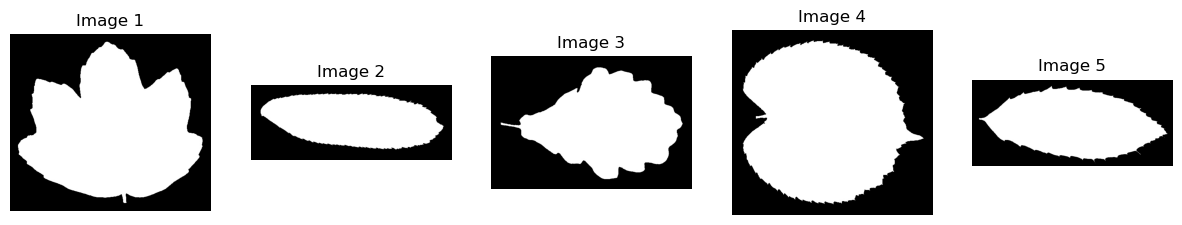

In [67]:
from PIL import Image
import os

image_dir = '.\data_files\images'
image_ids = train_df['id'].head(5).tolist() 

plt.figure(figsize=(15, 8))

for layer_number, image_id in enumerate(image_ids, 1):
    image_path = os.path.join(image_dir, f"{image_id}.jpg")
    image = Image.open(image_path).convert('RGB')

    plt.subplot(1, 5, layer_number)
    plt.imshow(image)
    plt.title(f"Image {layer_number}")
    plt.axis('off')

plt.show()


<h2>Visualizing the data</h2>
<a id="correlation-analysis"></a>

### Correlation Matrix and Distribution for Each Feature Group

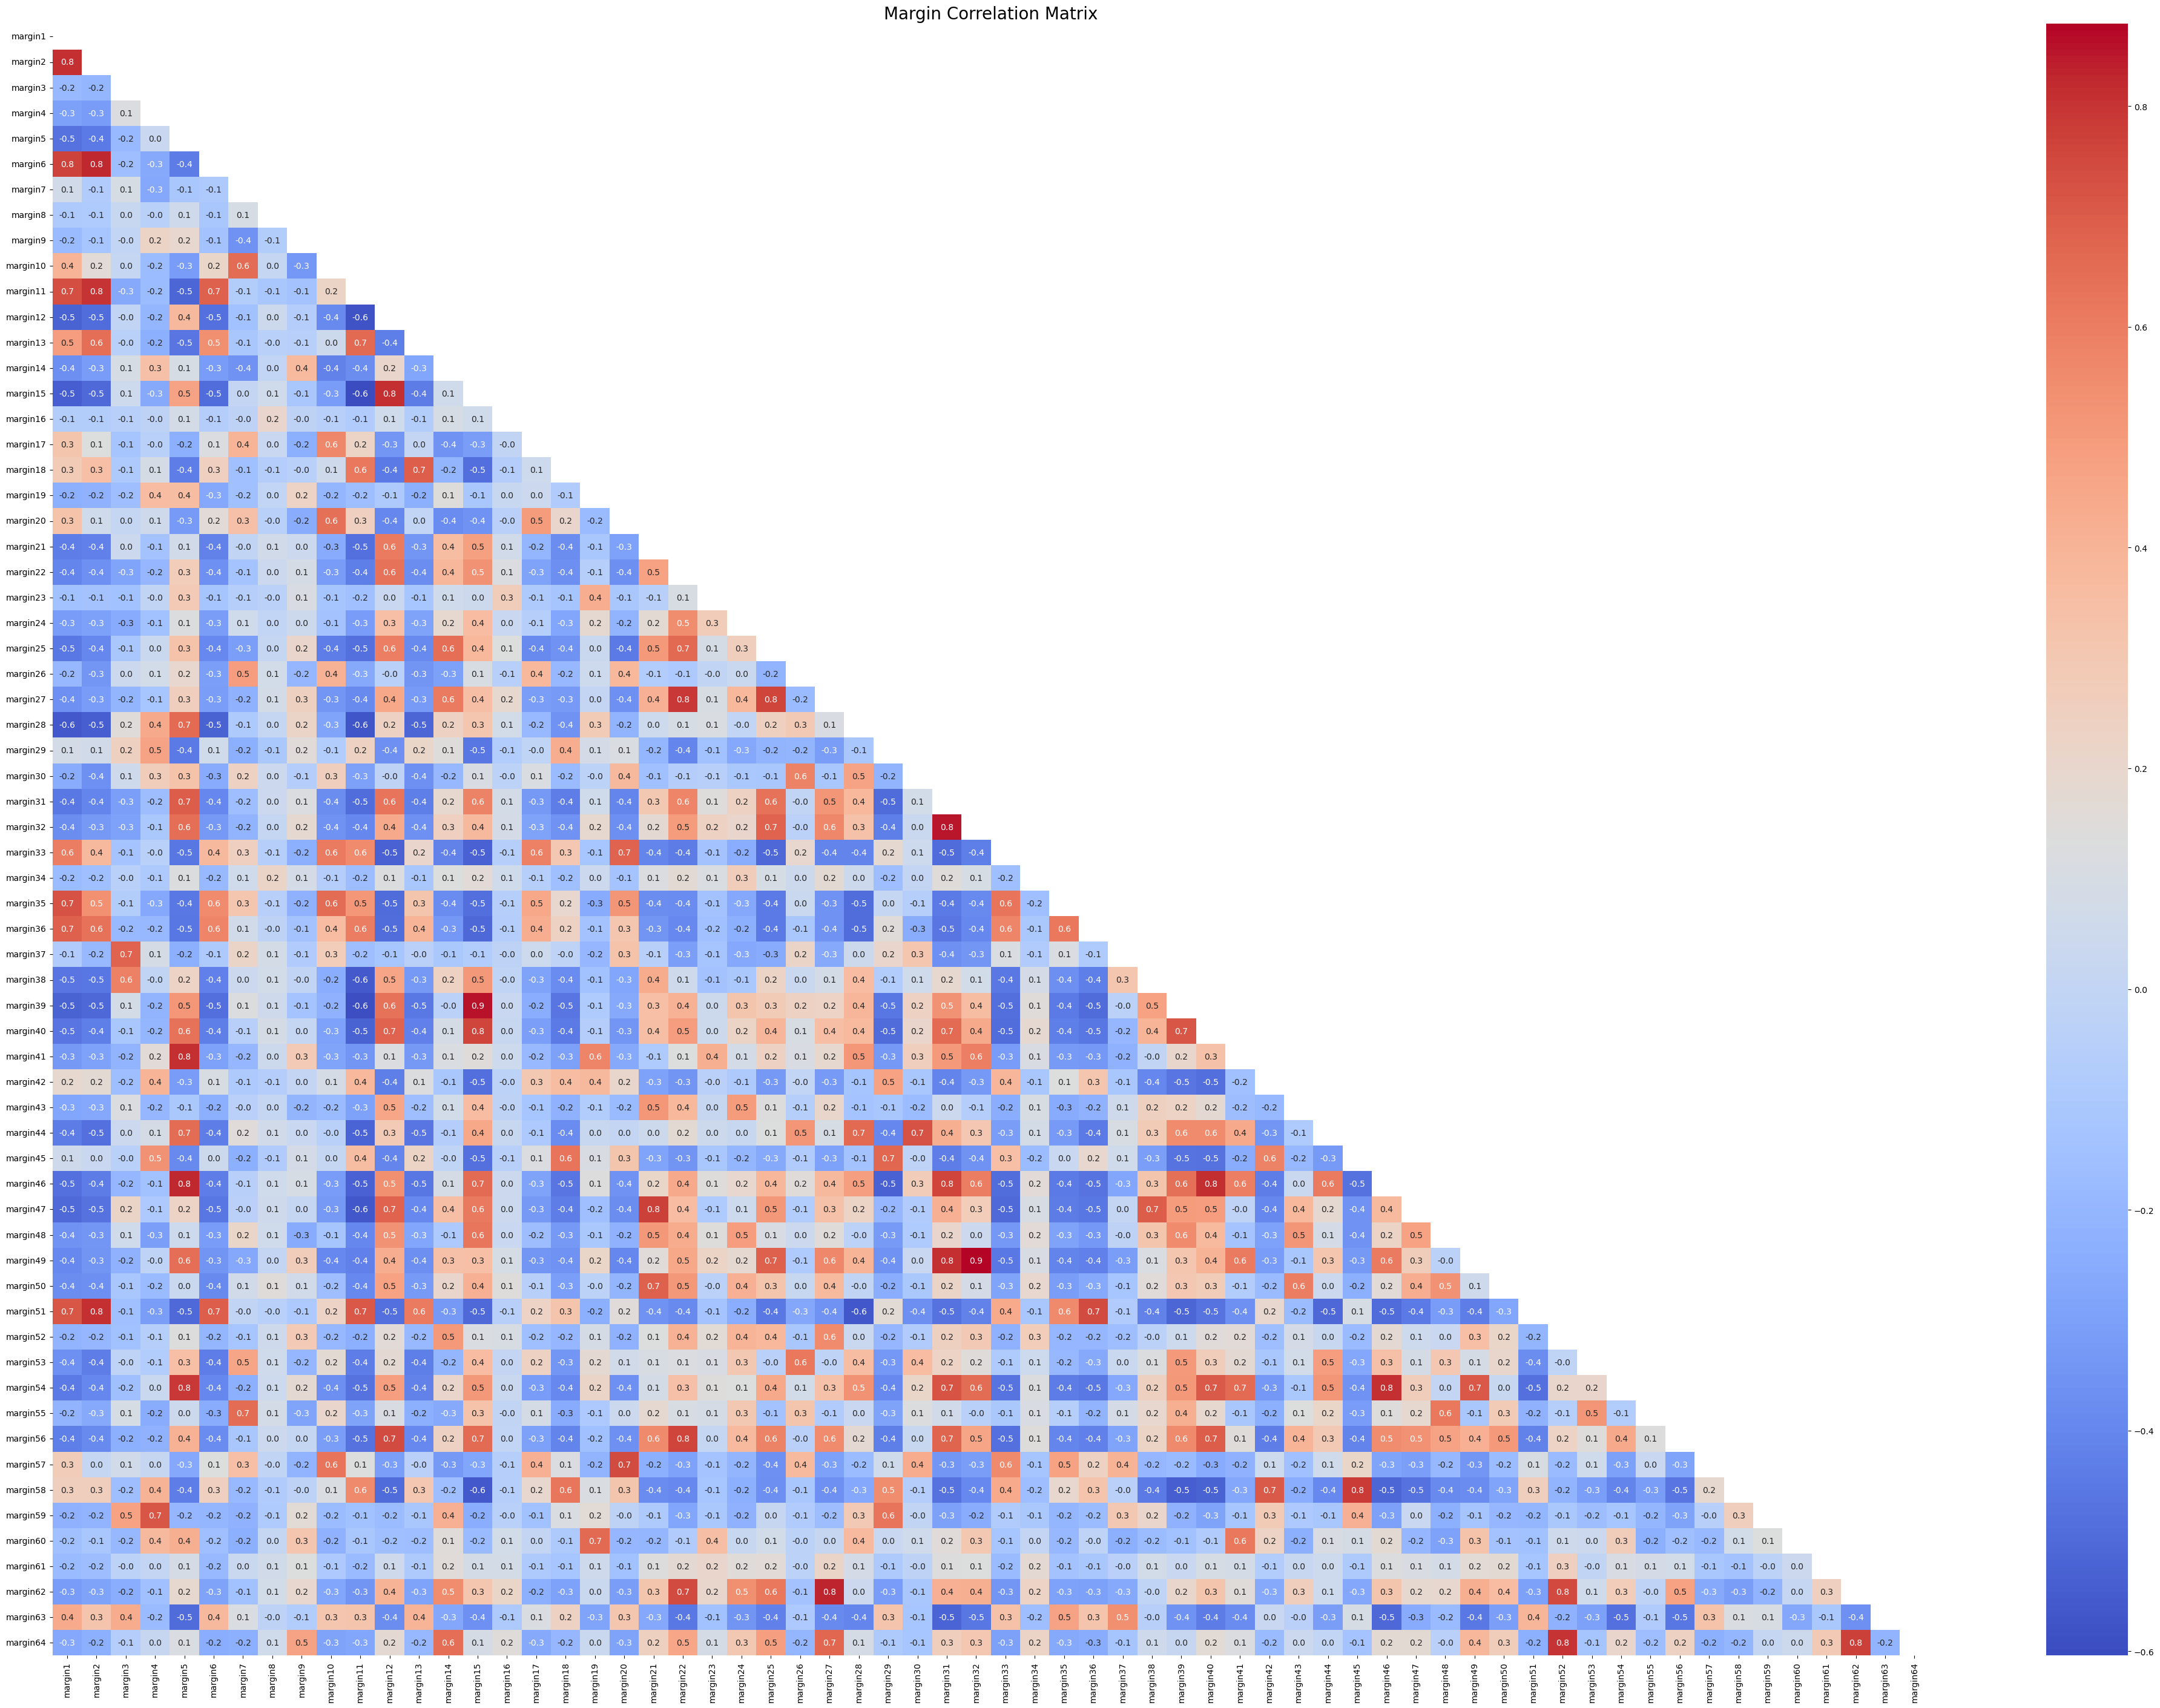

In [68]:
# correlation matrix for the margins
correlation_martix = train_df.loc[:,'margin1':'margin64'].corr()
plt.figure(figsize=(50,35))
sns.heatmap(correlation_martix, annot=True, cmap='coolwarm', fmt='.1f', mask=np.triu(correlation_martix) )
plt.title('Margin Correlation Matrix', fontsize=20)
plt.show()

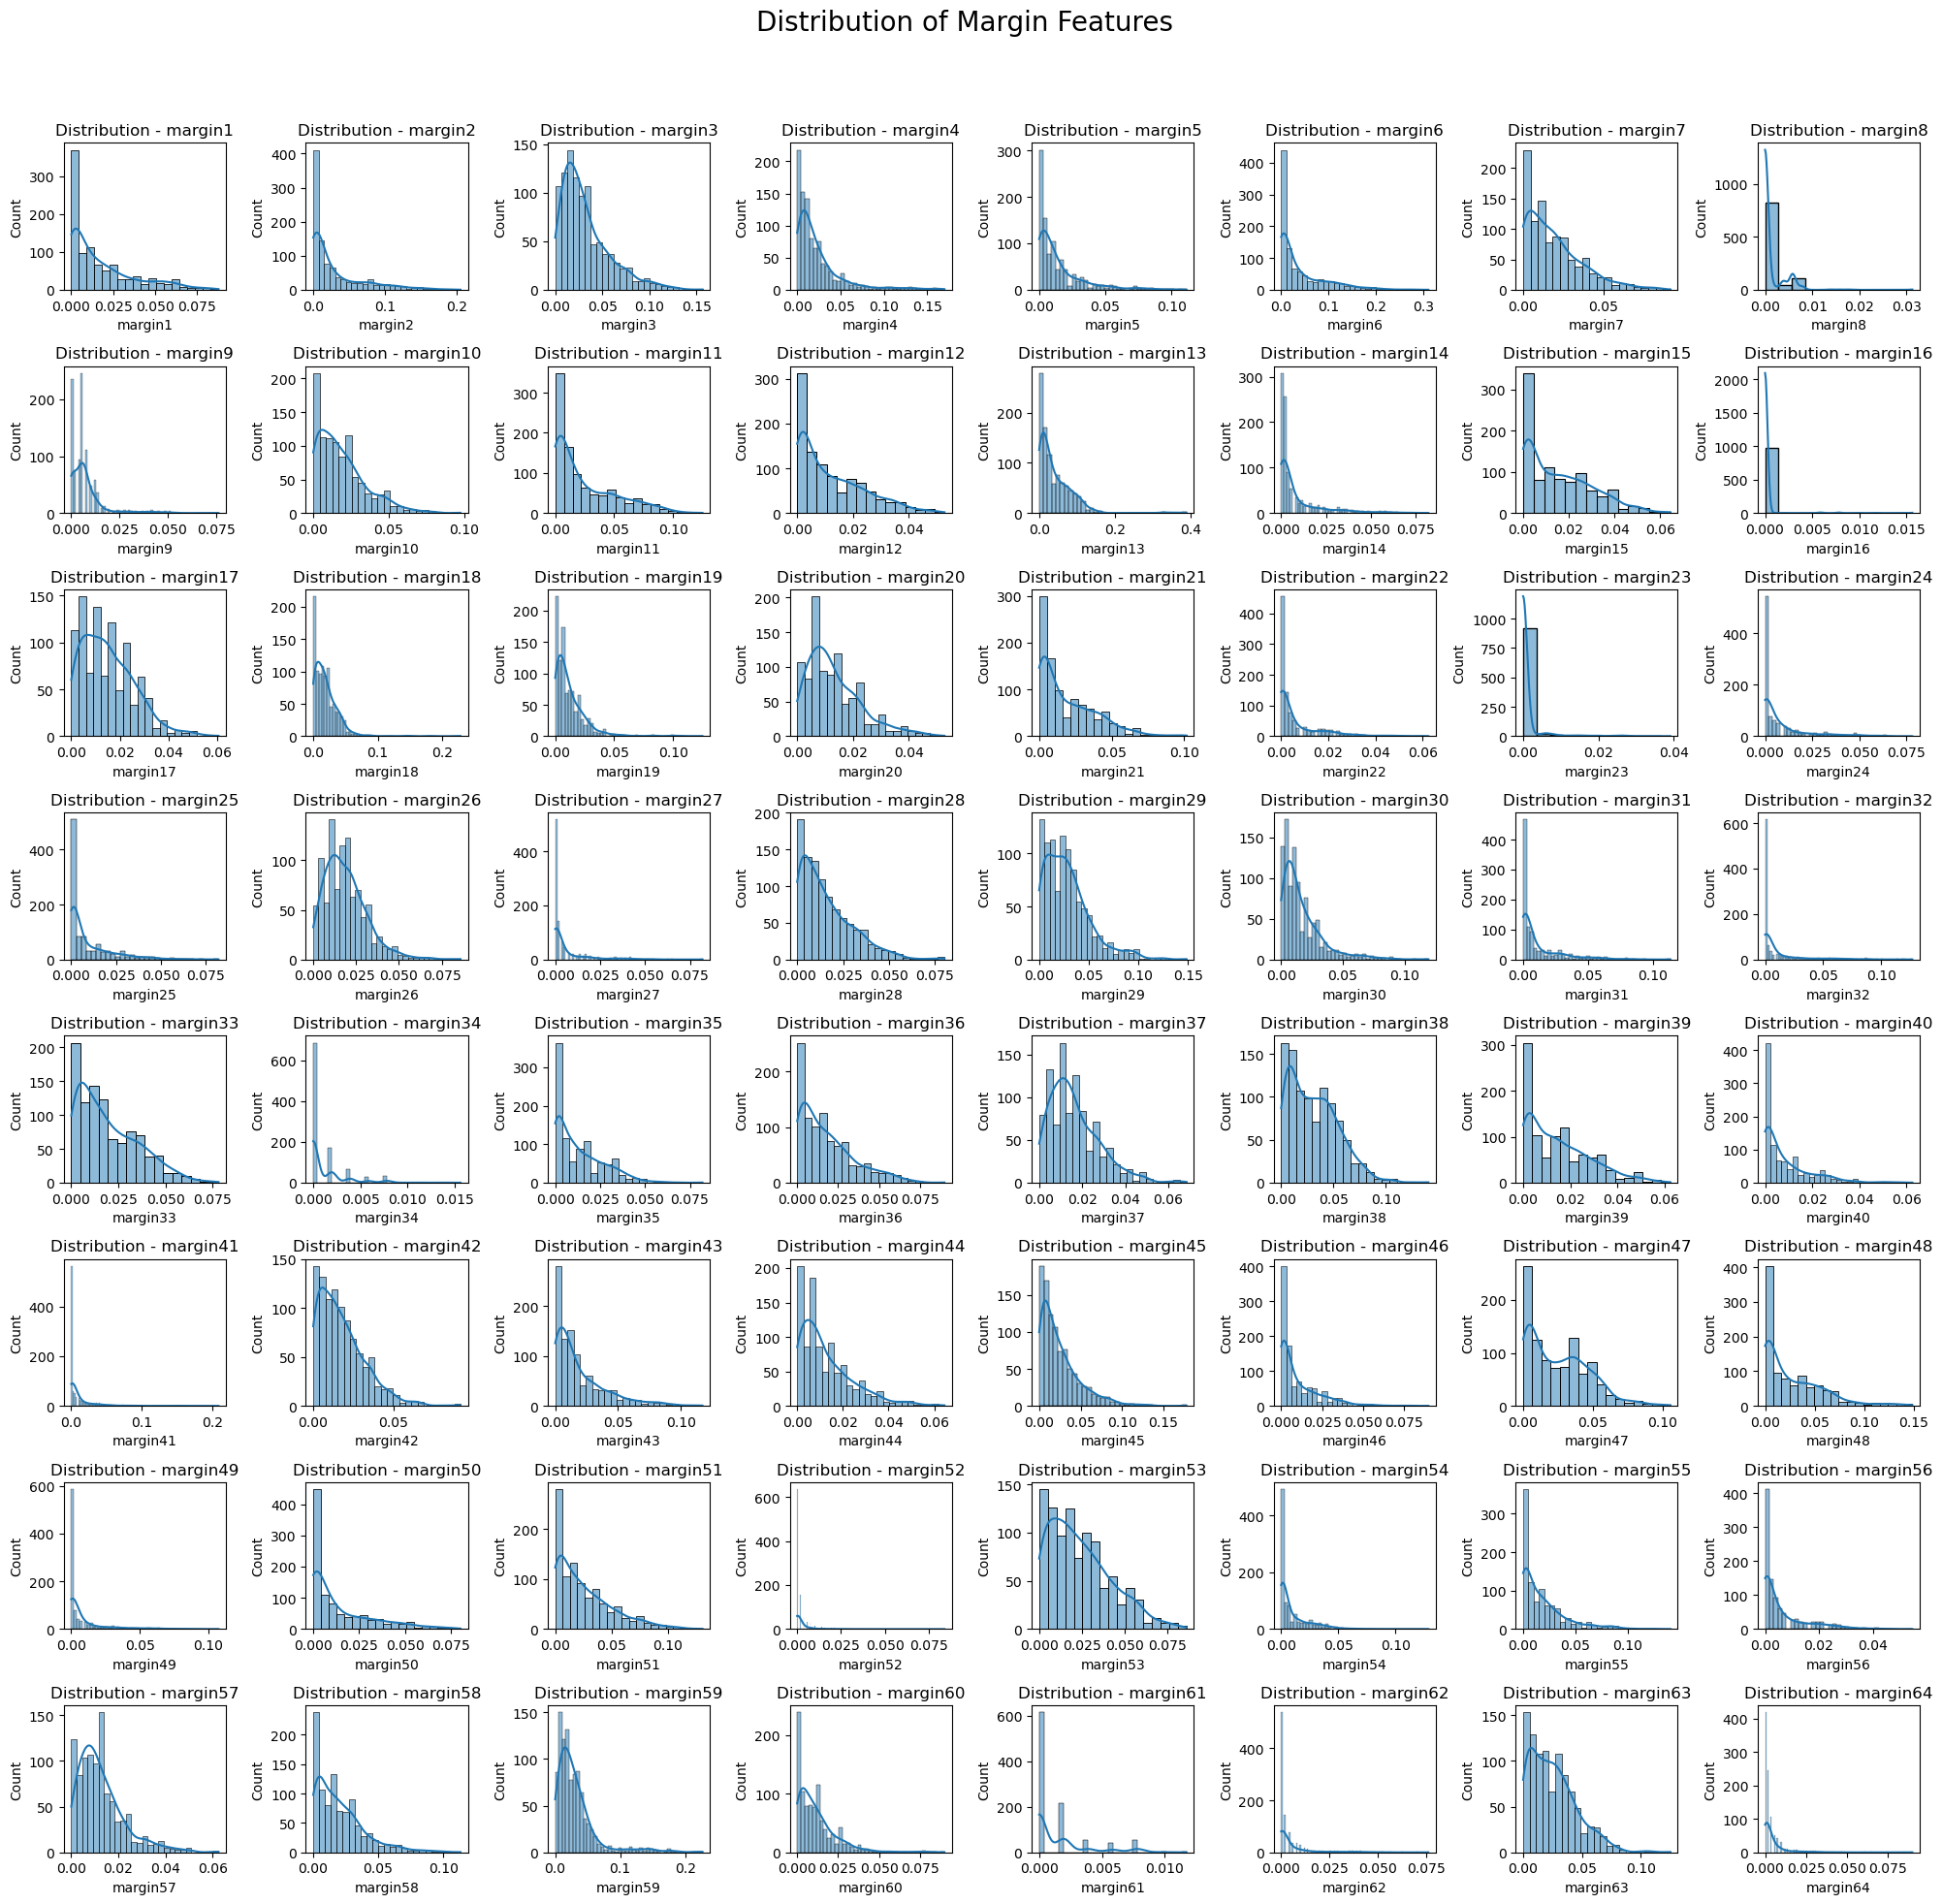

In [69]:
# distribution of margin features
features = train_df.loc[:, 'margin1':'margin64']

# Create subplots for each margin feature
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 20))
fig.suptitle('Distribution of Margin Features', fontsize=20)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Visualize the distribution for each margin feature
for i, feature in enumerate(features.columns):
    sns.histplot(train_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution - {feature}')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

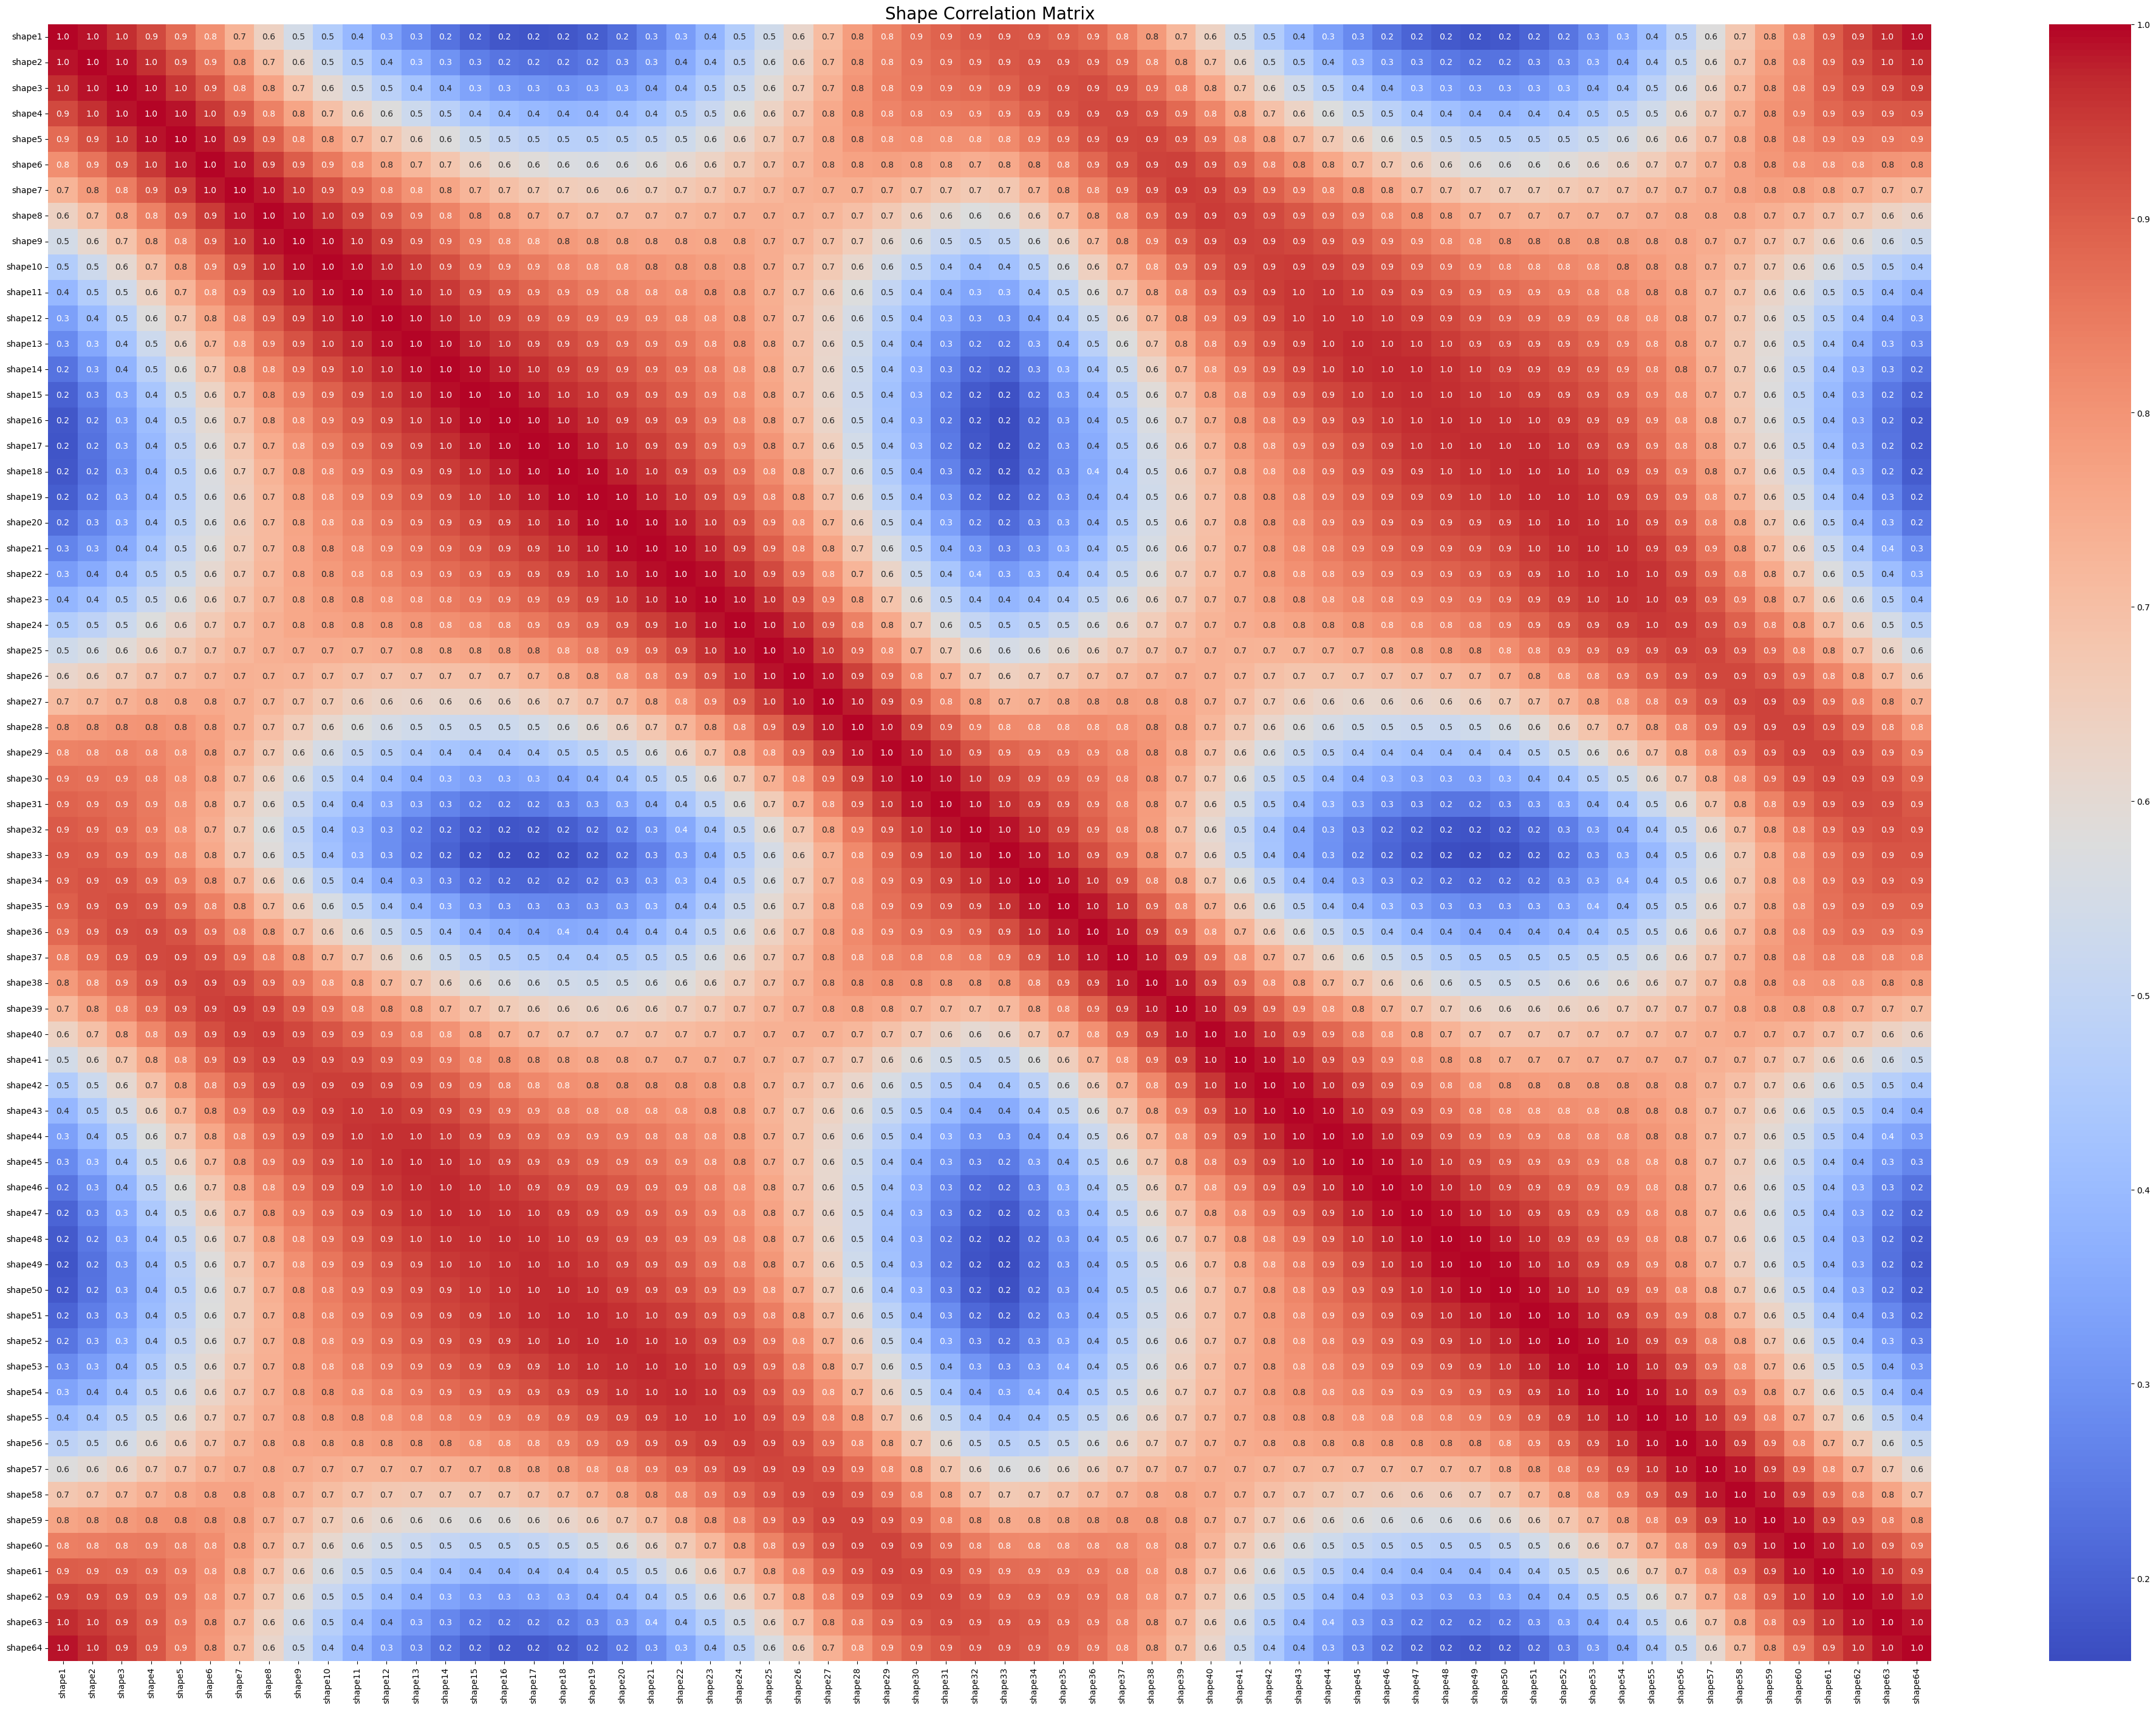

In [19]:
# correlation matrix for the shapes
correlation_martix = train_df.loc[:,'shape1':'shape64'].corr()
plt.figure(figsize=(50,35))
sns.heatmap(correlation_martix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Shape Correlation Matrix', fontsize=20)
plt.show()

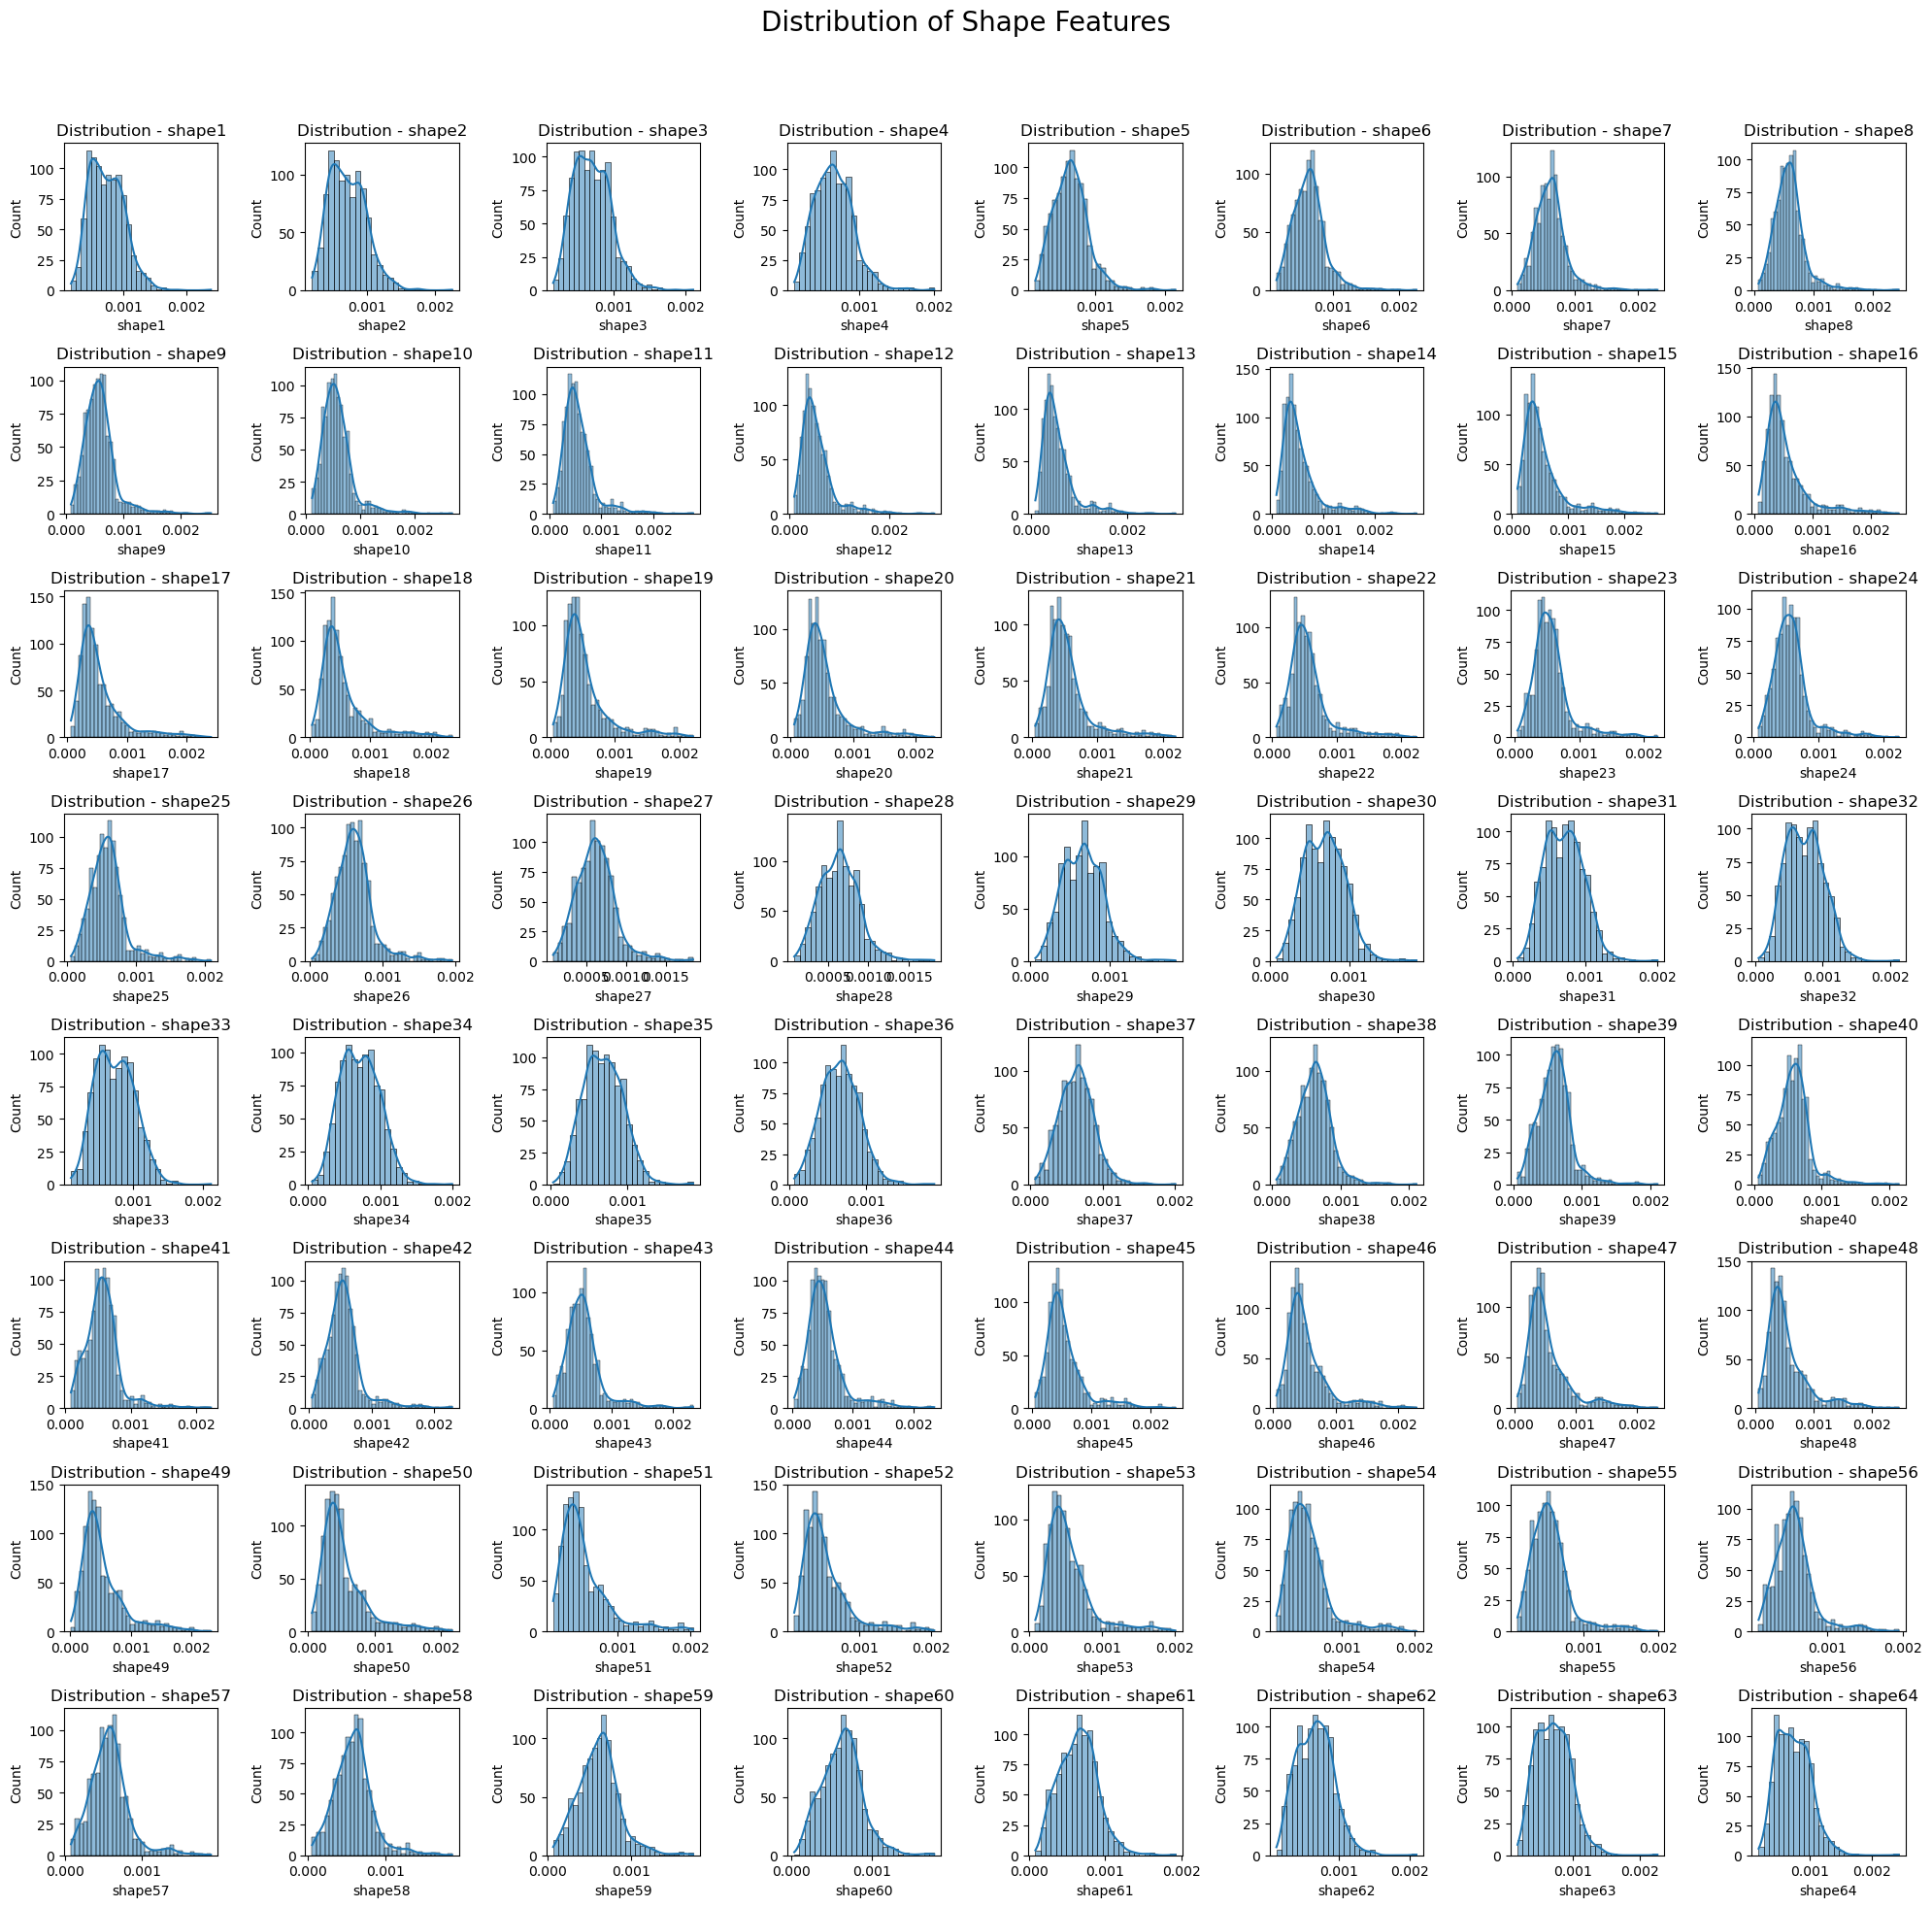

In [70]:
# distribution of shape features
features = train_df.loc[:, 'shape1':'shape64']

# Create subplots for each margin feature
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 20))
fig.suptitle('Distribution of Shape Features', fontsize=20)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Visualize the distribution for each margin feature
for i, feature in enumerate(features.columns):
    sns.histplot(train_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution - {feature}')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

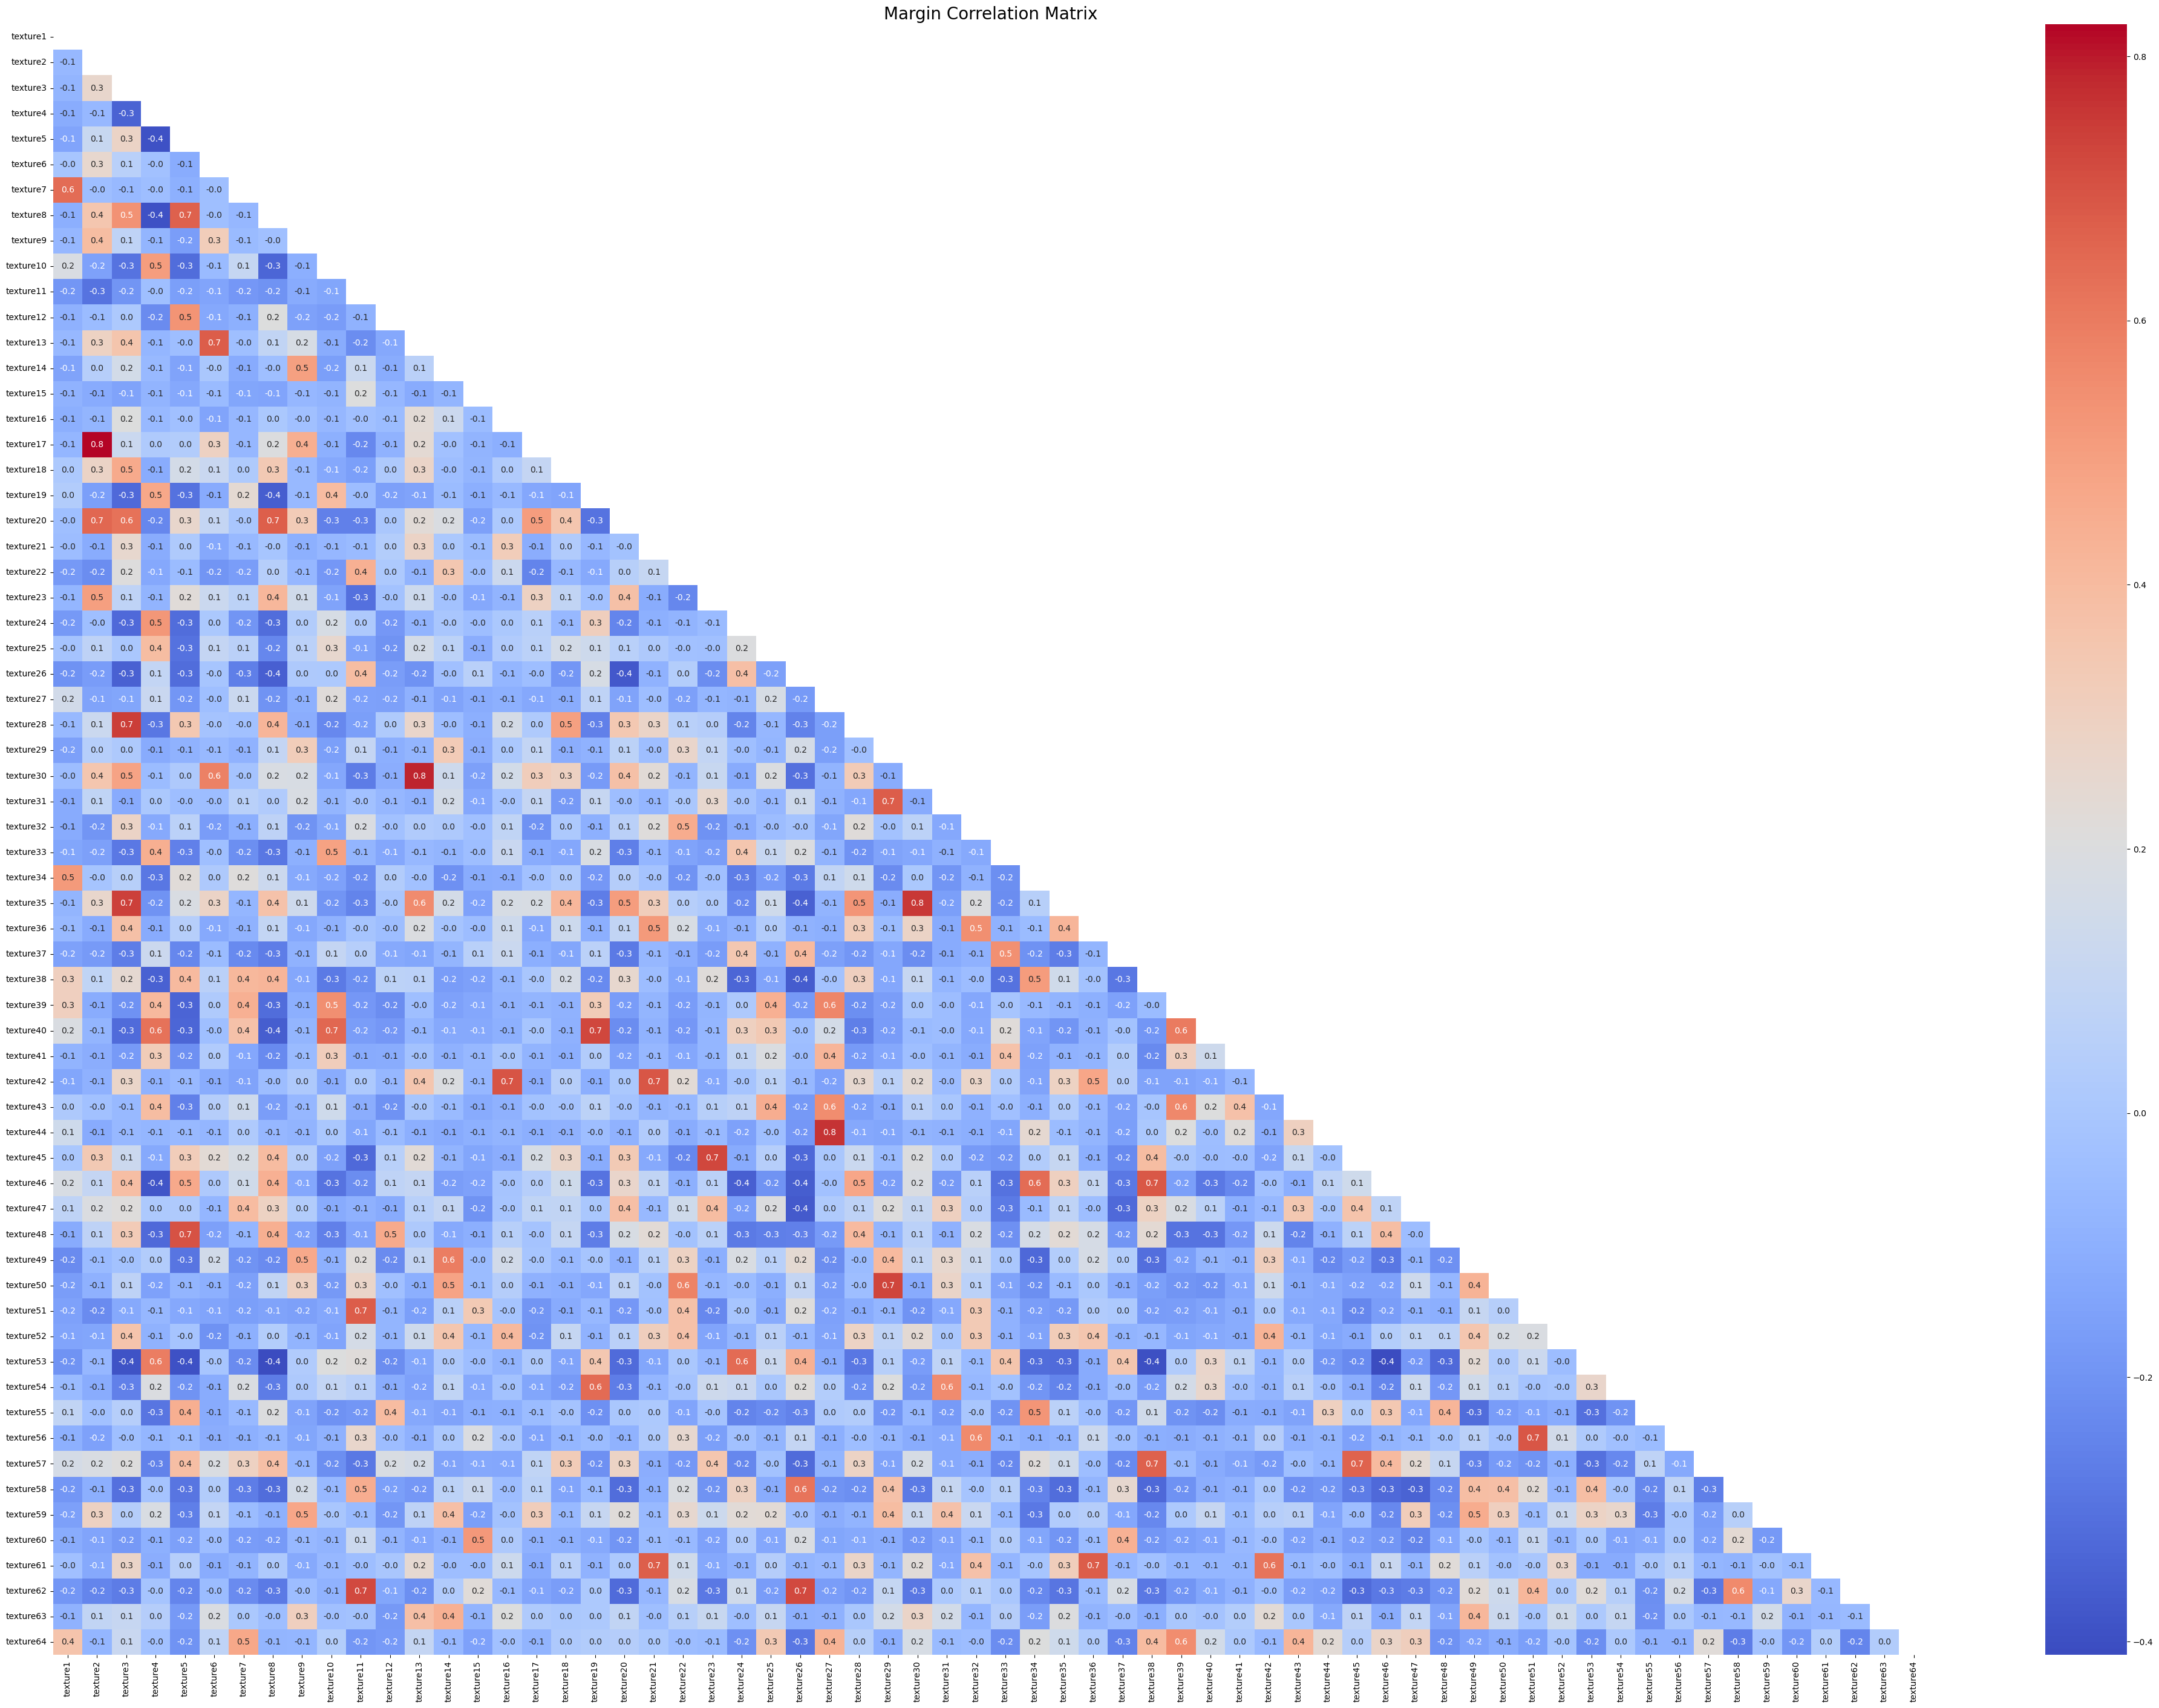

In [71]:
# correlation matrix for the texture
correlation_martix = train_df.loc[:,'texture1':'texture64'].corr()
plt.figure(figsize=(50,35))
sns.heatmap(correlation_martix, annot=True, cmap='coolwarm', fmt='.1f', mask=np.triu(correlation_martix) )
plt.title('Margin Correlation Matrix', fontsize=20)
plt.show()

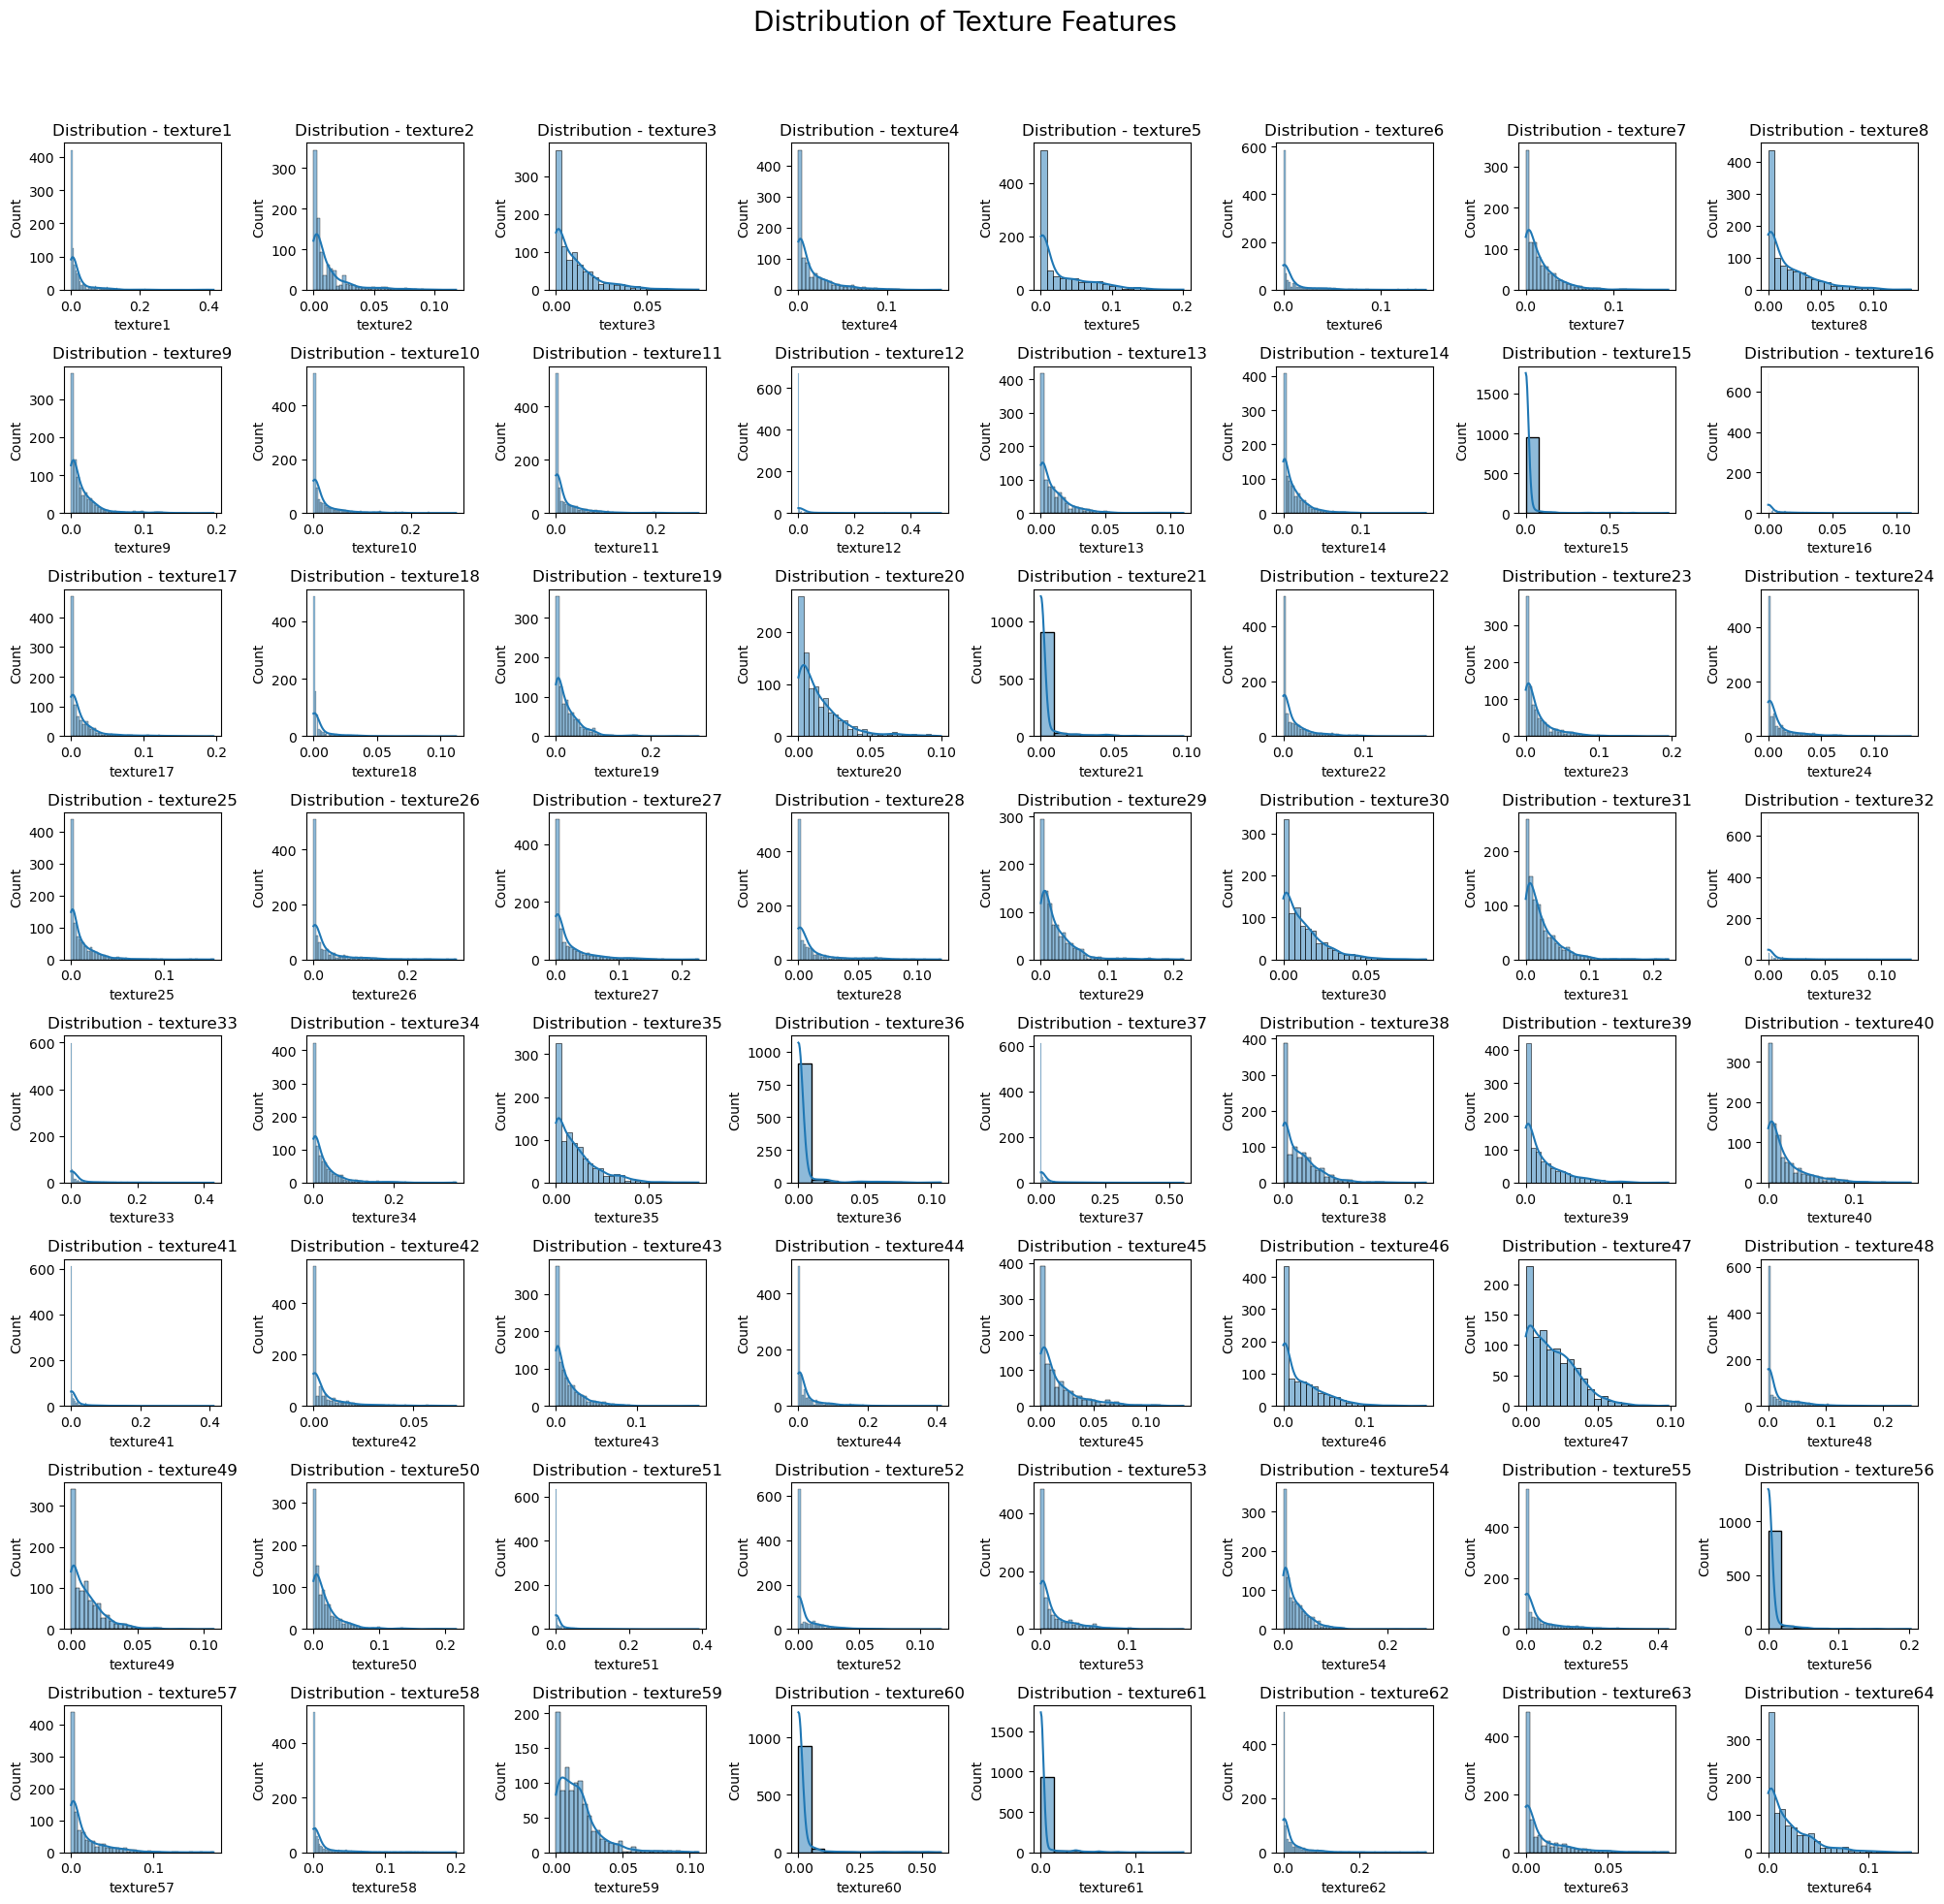

In [72]:
# distribution of texture features
features = train_df.loc[:, 'texture1':'texture64']

# Create subplots for each margin feature
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 20))
fig.suptitle('Distribution of Texture Features', fontsize=20)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Visualize the distribution for each margin feature
for i, feature in enumerate(features.columns):
    sns.histplot(train_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution - {feature}')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Deciding which split method to use
<a id="divide-data"></a>

#### We got two methods for splitting:
<ol>
<li>train_test_split</li>
<li>StratifiedShuffleSplit (sss)</li>
</ol>

<b>train_test_split:</b></br>
Usage: Commonly used for general train-test splitting, especially when the class distribution is not a significant concern.<br>
How it works: Randomly shuffles and splits the data into training and test sets.<br>
Advantage: Simplicity and ease of use. Suitable for well-balanced datasets.<br>

<b>StratifiedShuffleSplit:</b></br>
Usage: Typically used when you want to ensure that the distribution of classes in both the training and validation sets is representative of the overall distribution in the dataset.<br>
How it works: StratifiedShuffleSplit maintains the class distribution when creating random splits. It shuffles the data and then creates splits, ensuring that each split has a similar class distribution.<br>
Advantage: Useful when dealing with imbalanced datasets where certain classes have significantly fewer samples than others.<br>

If the dataset has a <b>balanced</b> class distribution, and just need a simple split, train_test_split is often sufficient and easier to use.<br>

If the dataset has <b>imbalanced</b> classes, and want to ensure that the class distribution is maintained in both training and validation sets, then StratifiedShuffleSplit is a good choice.<br>

To decide which approach is better the dataset, we can can check the distribution of the 'species' column in our dataset.

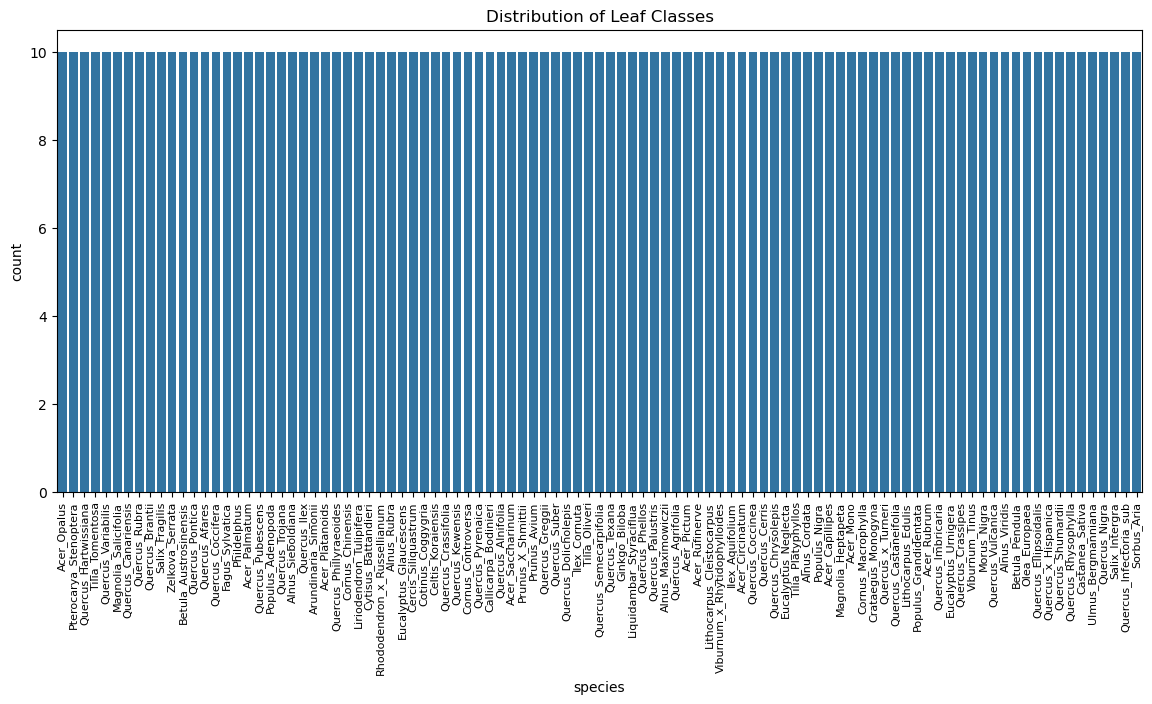

In [23]:
plt.figure(figsize=(14, 6))
sns.countplot(x='species', data=train_df)
plt.title('Distribution of Leaf Classes')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.show()

-----> since all the bars are the same height that means its balanced and we can use the regular train_test_split method

In [24]:
# Exclude 'id' and 'species' columns
X_features = train_df.drop(['species'], axis=1)
# y_target = train_df['species']

<h2>Train/Test split</h2>
Divide the data into a training and testing set using approximately 80% for training

In [25]:
# test_size = 0.2 meaning that the training set will be 0.8 (80%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)
X_validation,X_test,y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [26]:
X_train

id   margin1   margin2   margin3   margin4   margin5   margin6  \
753  1213  0.003906  0.000000  0.017578  0.009766  0.021484  0.013672   
215   364  0.000000  0.000000  0.003906  0.007812  0.048828  0.000000   
294   487  0.001953  0.001953  0.031250  0.037109  0.017578  0.001953   
49     78  0.000000  0.000000  0.021484  0.025391  0.029297  0.005859   
720  1159  0.019531  0.041016  0.046875  0.009766  0.001953  0.046875   
..    ...       ...       ...       ...       ...       ...       ...   
106   190  0.011719  0.017578  0.115230  0.019531  0.015625  0.013672   
270   449  0.003906  0.005859  0.003906  0.121090  0.000000  0.015625   
860  1378  0.064453  0.136720  0.011719  0.003906  0.000000  0.115230   
435   714  0.000000  0.000000  0.009766  0.007812  0.027344  0.000000   
102   183  0.001953  0.005859  0.007812  0.005859  0.035156  0.042969   

      margin7   margin8   margin9  ...  texture55  texture56  texture57  \
753  0.023438  0.007812  0.001953  ...   0.000000   0.000977   0.000000   
215  0.005859  0.000000  0.013672  ...   0.156250   0.025391   0.000000   
294  0.039062  0.000000  0.005859  ...   0.000977   0.000000   0.030273   
49   0.000000  0.000000  0.023438  ...   0.000000   0.000000   0.063477   
720  0.078125  0.000000  0.001953  ...   0.006836   0.000000   0.006836   
..        ...       ...       ...  ...        ...        ...        ...   
106  0.017578  0.003906  0.001953  ...   0.042969   0.000000   0.055664   
270  0.005859  0.000000  0.000000  ...   0.000000   0.000000   0.003906   
860  0.001953  0.000000  0.009766  ...   0.002930   0.000000   0.062500   
435  0.023438  0.000000  0.001953  ...   0.000000   0.000000   0.000000   
102  0.027344  0.005859  0.005859  ...   0.001953   0.000000   0.000977   

     texture58  texture59  texture60  texture61  texture62  texture63  \
753   0.071289   0.008789   0.050781        0.0   0.092773   0.002930   
215   0.004883   0.017578   0.000000        0.0   0.024414   0.000000   
294   0.000000   0.017578   0.000000        0.0   0.005859   0.043945   
49    0.000000   0.009766   0.000000        0.0   0.000000   0.039062   
720   0.000977   0.019531   0.000000        0.0   0.005859   0.002930   
..         ...        ...        ...        ...        ...        ...   
106   0.000000   0.009766   0.000000        0.0   0.000000   0.000000   
270   0.000000   0.000000   0.000000        0.0   0.000000   0.000000   
860   0.002930   0.005859   0.000000        0.0   0.011719   0.000000   
435   0.159180   0.001953   0.025391        0.0   0.114260   0.006836   
102   0.009766   0.048828   0.001953        0.0   0.012695   0.015625   

     texture64  
753   0.000000  
215   0.011719  
294   0.072266  
49    0.000000  
720   0.011719  
..         ...  
106   0.024414  
270   0.041016  
860   0.075195  
435   0.000000  
102   0.033203  

[792 rows x 193 columns]

In [27]:
y_train

753         Betula_Pendula
215         Acer_Rufinerve
294       Quercus_Kewensis
49        Acer_Saccharinum
720            Acer_Opalus
              ...         
106     Quercus_Variabilis
270          Olea_Europaea
860    Eucalyptus_Neglecta
435            Sorbus_Aria
102     Tilia_Platyphyllos
Name: species, Length: 792, dtype: object

<h2>Data Standardization</h2>
<a id="standardize-data"></a>

#### Objective:
Standardize the data, <br>by computing the mean and standard deviation for each feature dimension using the training set only, <br>
then subtracting the mean and dividing by the stdev for each feature and each sample.

The <code>fit_transform</code> method is used to compute the mean and standard deviation from the training set (X_train) and <i>simultaneously</i> standardize it.<br>
Here's how it works:<br>

<code>fit_transform</code>: The fit method computes the mean and standard deviation for each feature in the training set (X_train). It calculates the mean and standard deviation separately for each feature dimension.<br>

<code>transform</code>: The transform method then applies the computed mean and standard deviation to standardize the training set. It subtracts the mean and divides by the standard deviation for each feature and each sample in the training set.<br>

So, the <code>fit_transform</code> method combines the process of computing the statistics (mean and standard deviation) from the training set and applying the standardization to the same set in a single step.

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>Label Encoding</h2>
<a id="encode-labels"></a>

In [29]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_validation_encoded = label_encoder.transform(y_validation)

# Image Preprocessing
<a id="image-preprocess"></a>

#### Define the image size

In [30]:
IMAGE_SIZE = 128

#### Load some images

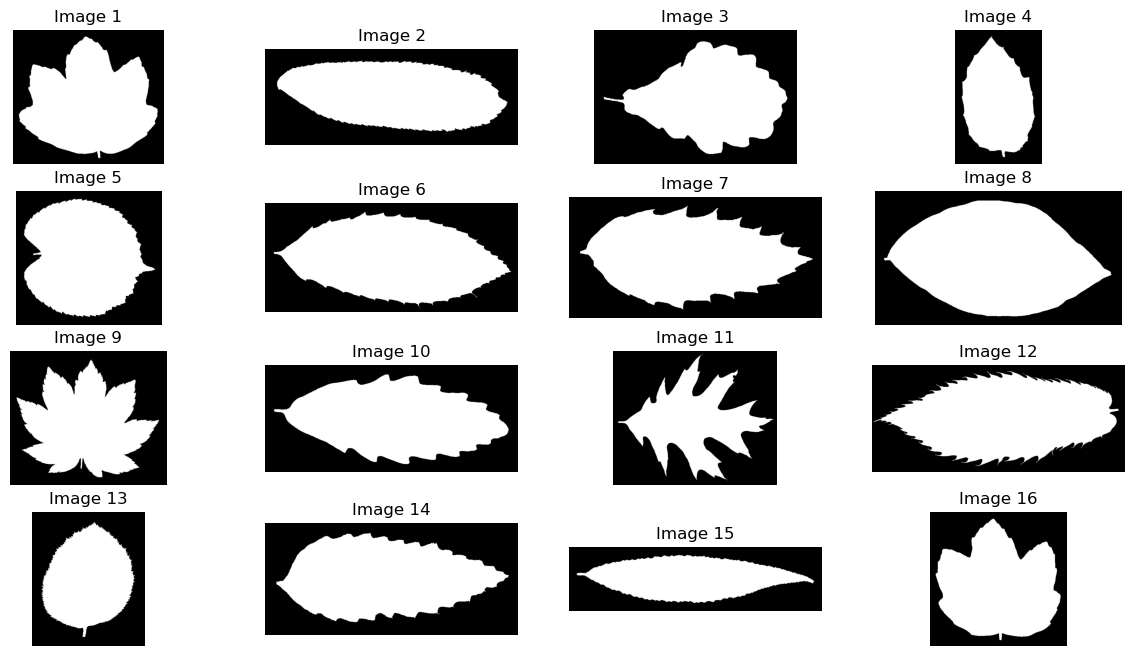

In [31]:
import cv2
sample_images = []

plt.figure(figsize=(15, 8))
for i in range(1,17):
    img = cv2.imread(("data_files/images/" + str(i) + '.jpg'))
    cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    sample_images.append(img)
    plt.subplot(4,4, i)
    plt.imshow(img)
    plt.title(f"Image {i}")
    plt.axis('off')

plt.show()

As we can see all images are black and white which makes the training easier since we can convert the image to just one channel of ones and zeroes

But there are two problems with the images, the first is that they aren't of the same size, and the other is that they don't even have the same aspect ratio.

There first part is somewhat easy if the images all have the aspect ratio which is not the case so first we will try to fix the aspect ratio problem (we're aiming for a 1:1 aspect ratio)


#### Proposed solutions for the aspect ratio problem
1.Crop the image along the larger dimension

The problem with this approach is that the image tightly fits the leaves, so cropping the image would remove a lot of valuable information about the leaves

2.Stretch the image along the smaller dimension or shrinking along the wider dimension

The problem with this approach is that stretching the image could drastically change the look of the leaves.

3.Add black bars to on either side of the smaller dimension

We found this approach to be the best since it doesn't change how the leaves look in any way

#### Adding black bars to images

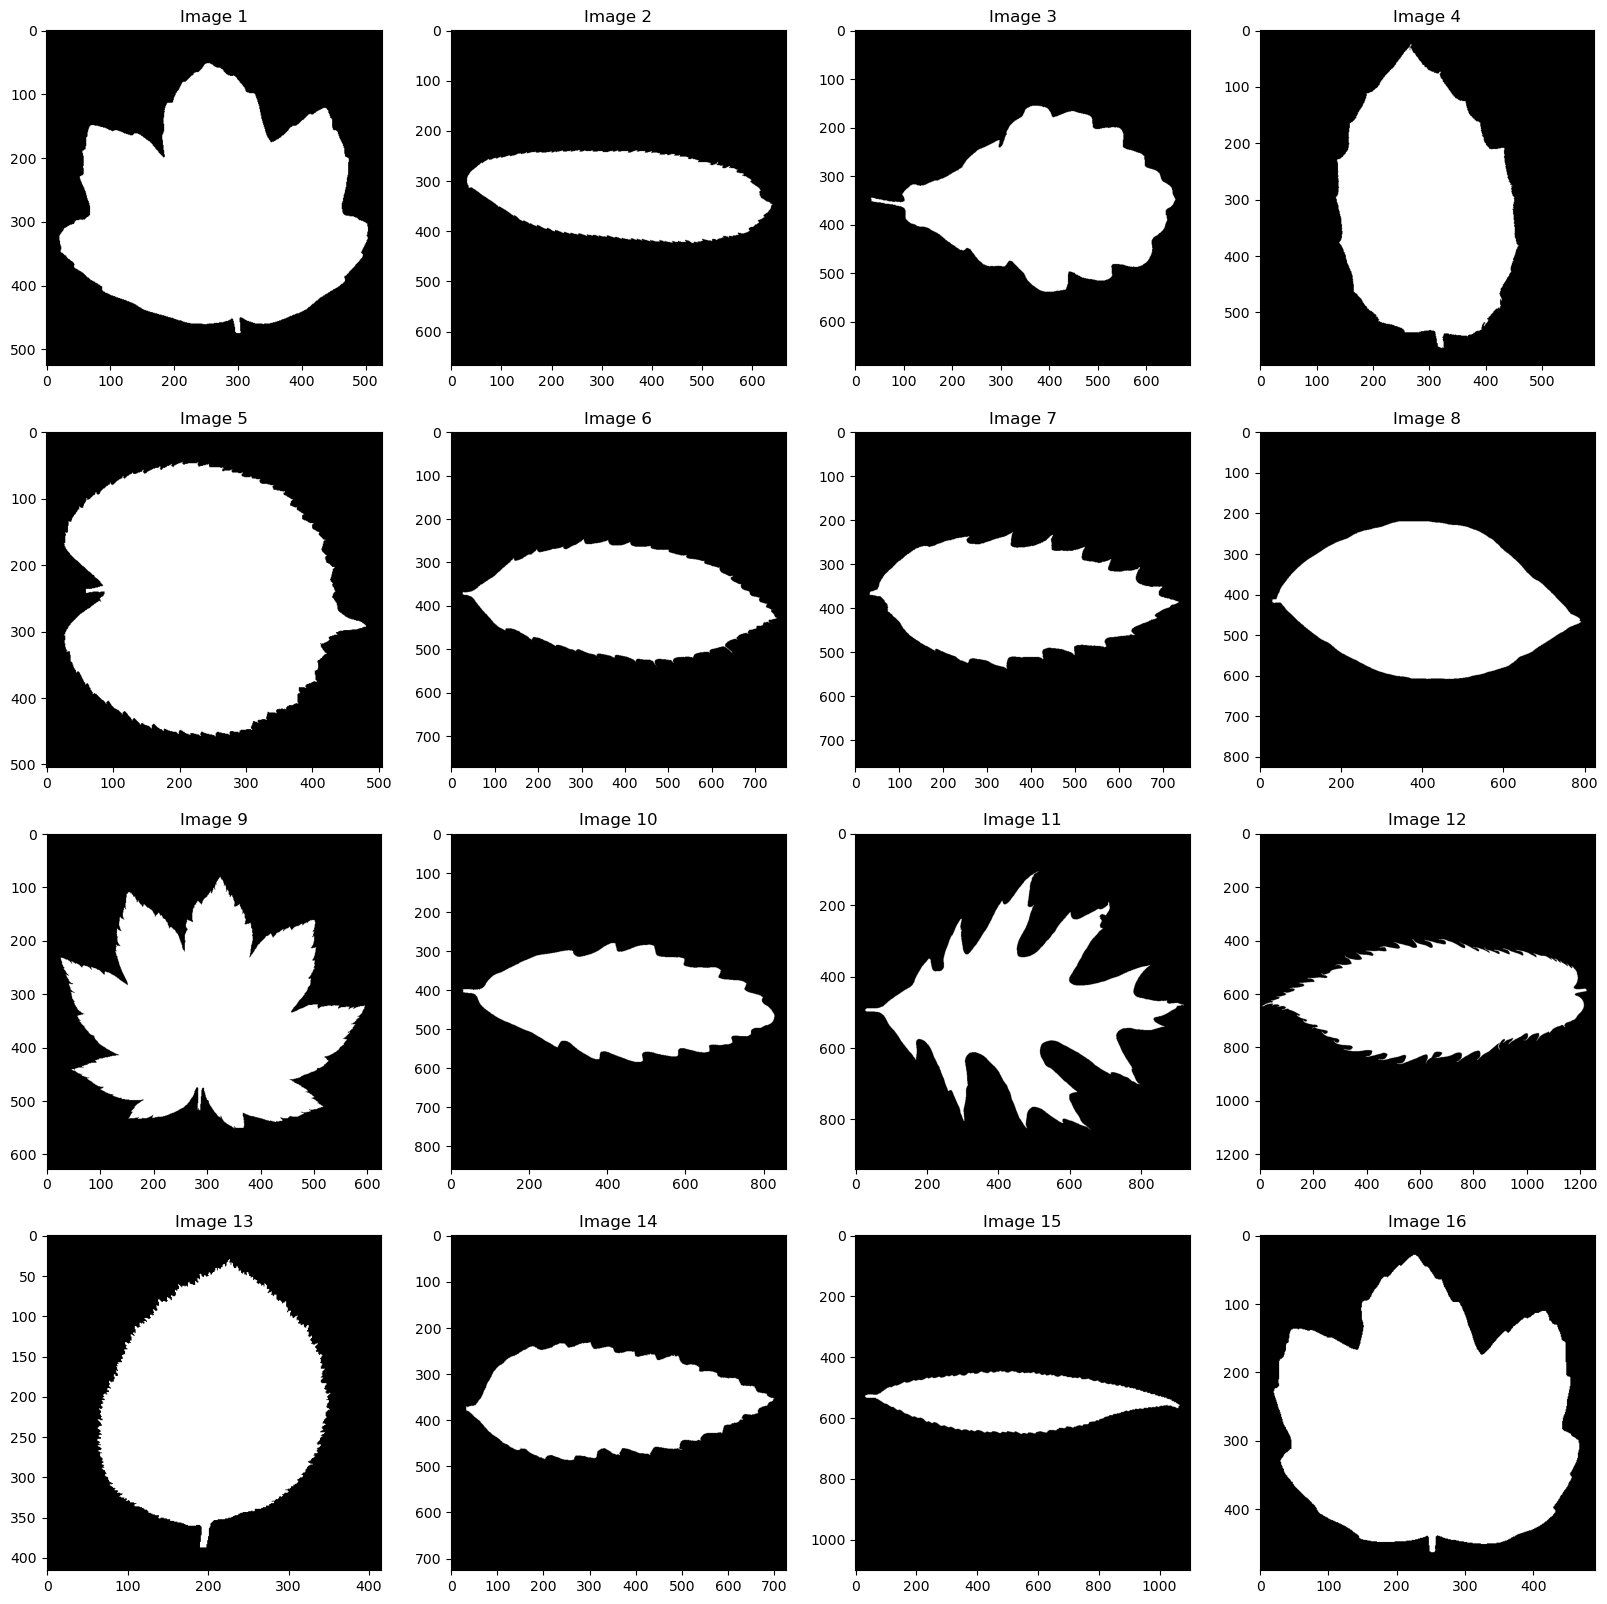

In [32]:
modified_samples = []
plt.figure(figsize=(20, 20))
for i, image in enumerate(sample_images):
    height = image.shape[0]
    width = image.shape[1]
    diff = int(abs(width-height)/2)
    color = (0,0,0)
    result = image.copy()
    if width<height:
        result = cv2.copyMakeBorder(result, 0,0,diff,diff, cv2.BORDER_CONSTANT,None, value=color)
    elif width>height:
        result = cv2.copyMakeBorder(result, diff,diff,0,0, cv2.BORDER_CONSTANT,None,  value=color)
    modified_samples.append(result)
    plt.subplot(4,4,i+1)
    plt.imshow(result)
    plt.title(f"Image {i+1}")

plt.show()

#### Resizing images

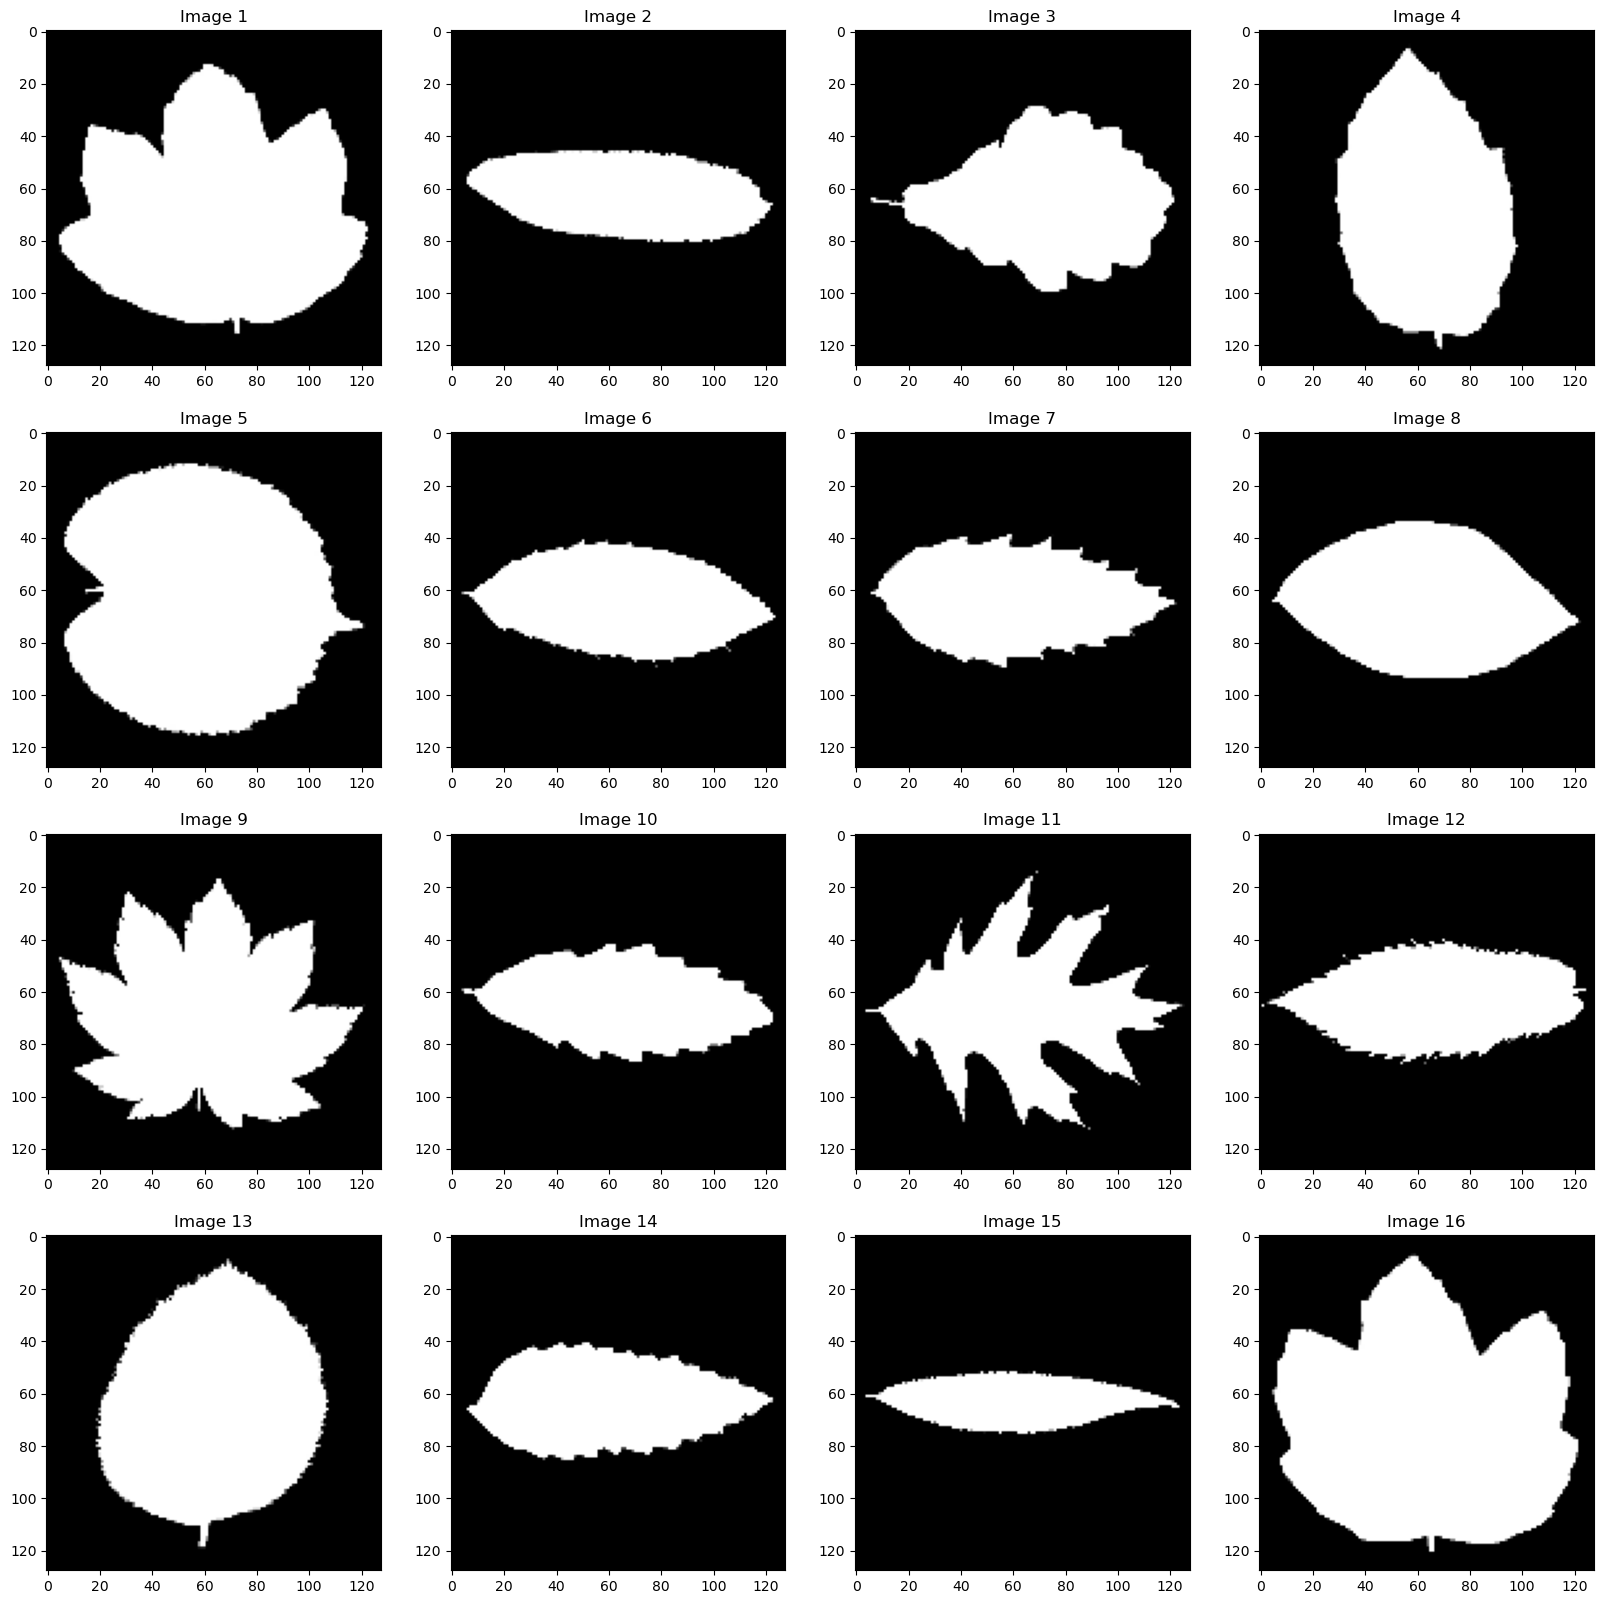

In [33]:
plt.figure(figsize=(20, 20))
for i, image in enumerate(modified_samples):
    result = cv2.resize(image, (IMAGE_SIZE,IMAGE_SIZE))
    plt.subplot(4,4,i+1)
    plt.imshow(result)
    plt.title(f"Image {i+1}")

plt.show()

#### Now lets create a method to do all of this

In [34]:
import numpy as np

def regularize_img(img):
     # height, width, number of channels in image
    height = img.shape[0]
    width = img.shape[1]
    diff = int(abs(width-height)/2)
    color = (0,0,0)
    result = img.copy()
    if width<height:
        result = cv2.copyMakeBorder(result, 0,0,diff,diff, cv2.BORDER_CONSTANT, value=color)
    elif width>height:
        result = cv2.copyMakeBorder(result, diff,diff,0,0, cv2.BORDER_CONSTANT, value=color)

    # resize images
    result = cv2.resize(result, (IMAGE_SIZE,IMAGE_SIZE))
    
    return result

<h1>Part II: Training the Neural Network</h1>

#### Create a function to load images by their IDs

In [35]:
from keras.preprocessing import image

def load_img_data(data):
    data_ID = data['id']

    X = np.empty((len(data_ID), IMAGE_SIZE, IMAGE_SIZE, 1))
    for i, idnum in enumerate(data_ID):
        x = cv2.imread(("data_files/images/" + str(idnum) + '.jpg'), cv2.IMREAD_GRAYSCALE)
        x = image.img_to_array(regularize_img(x))
        X[i] = x

    # since all the images are black and white, divide all pixel values by 255 to make it all values either zeroes or ones
    return np.around(X / 255.0)


#### Add imports needed to create our model

In [36]:
import time
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
import keras.utils as image
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, Input

#### Load the images for each of training, validation, testing splits

In [37]:
#train data
train_x = load_img_data(X_train)
train_y = y_train_encoded
print(train_x.shape)
print(train_y.shape)

#validation data
validation_x = load_img_data(X_validation)
validation_y = y_validation_encoded
print(validation_x.shape)
print(validation_y.shape)

#test data
test_x = load_img_data(X_test)
test_y = y_test_encoded
print(test_x.shape)
print(test_y.shape)


(792, 128, 128, 1)
(792,)
(99, 128, 128, 1)
(99,)
(99, 128, 128, 1)
(99,)


#### Define an array for the values to be tested for each hyperparameter

In [38]:
batch_sizes = [64,128,256]
numbers_of_layers = [1,2,3,4,5]
dropout_rates = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
optimizers = [(keras.optimizers.Adam,None),(keras.optimizers.SGD,0.01),(keras.optimizers.RMSprop,None)]
weight_decays = [0.0001,0.001,0.01]
learning_rates = [0.0005,0.001,0.005,0.01]
learning_rate_schedulers = [
    None,
    keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,decay_steps=1000,decay_rate=0.9),
    keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=0.01,decay_steps=1000,decay_rate=0.9),
    keras.optimizers.schedules.CosineDecay(initial_learning_rate=0.01,decay_steps=1000),
    keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=0.01,decay_steps=1000)
    ]

#### Define the default value for each hyperparameter

In [39]:
default_batch_size = 128
default_number_of_layers = 3
default_dropout_rate = 0.5
default_optimizer = (keras.optimizers.Adam,None)
default_weight_decay = 0.01
default_learning_rate = 0.001
default_learning_rate_scheduler = None

#### Define a function to generate a model based on the given hyperparamteres and triain it

In [40]:
def generateModel(
        hyperparameter_category,
        hyperparameter_value,
        batch_size=default_batch_size,
        number_of_layers=default_number_of_layers,
        dropout_rate=default_dropout_rate,
        optimizer=default_optimizer,
        weight_decay=default_weight_decay,
        learning_rate=default_learning_rate,
        learning_rate_scheduler=default_learning_rate_scheduler):
    
    input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1), name='image')
    kernel_regularizer=keras.regularizers.L2(l2=weight_decay)
    def NaiveCovNet():
        BASE_CONV_FILTERS = 8
        x = input_layer
        for _ in range(number_of_layers):
            x = Conv2D(BASE_CONV_FILTERS, 5, kernel_regularizer=kernel_regularizer,padding='same')(x)
            x = (Activation('relu'))(x)
            x = (MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(x)
            BASE_CONV_FILTERS*=2

        # Flatten our array
        x = Flatten()(x)
        x = Dense(2048, kernel_initializer='glorot_normal', kernel_regularizer=kernel_regularizer,  activation='relu')(x)
        x = Dropout(dropout_rate)(x)

        x = Dense(99, kernel_initializer='glorot_normal', kernel_regularizer=kernel_regularizer, activation='relu')(x)
        x = Dropout(dropout_rate)(x)

        output_layer = Dense(99, activation='softmax')(x)
        model = Model(input_layer, output_layer)
        return model


    model = NaiveCovNet()

    optimizer_object = optimizer[0]()
        
    learning_rate_scheduler_name = str(learning_rate_scheduler.__class__).split(".")[-1][:-2]
    
    if optimizer[1] is not None:
        optimizer_object.learning_rate=optimizer[1]

    if learning_rate_scheduler is None:
        if optimizer[1] is not None:
            optimizer_object.learning_rate=optimizer[1]
        else:
            optimizer_object.learning_rate = learning_rate
        learning_rate_scheduler_name = "fixed"
    
    model.compile(optimizer=optimizer_object, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    optimizer_name = str(optimizer_object.__class__).split(".")[-1][:-2]
    
    hyperparameters = [batch_size,number_of_layers,dropout_rate,optimizer_name,weight_decay,learning_rate,learning_rate_scheduler_name]

    def getLogName():
        return " ".join([str(x) for x in hyperparameters])
    
    print(getLogName())
        
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs/{}/{}".format(hyperparameter_category,hyperparameter_value))
    patience_callback =  keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(train_x, train_y,validation_data=(validation_x,validation_y), epochs=100, batch_size=batch_size, callbacks=[tensorboard_callback,patience_callback])
    return model

#### Import garbage collector
Since initializing models in succession may result in the out of memory (OOM) errors, we will user the garbage collector to delete models after they finish training

In [41]:
import gc

##### Initialize a list to store the testing results for all hyperparameters

In [42]:
testing_logs = []

#### Record the start time of the training to measure the total training time for all hyperparamters

In [43]:
start_time  = time.time()

#### Testing batch sizes

In [44]:
testing_accuracies = []

for batch_size in batch_sizes:
    model = generateModel(hyperparameter_category="Batch Sizes",hyperparameter_value=batch_size,batch_size=batch_size)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])
    del(model)
    gc.collect()

testing_logs.append("\nBatch Sizes:")
for i in range(len(batch_sizes)):
    log = f"{batch_sizes[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 8)       208       
                                                                 
 activation (Activation)     (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        3216      
                                                                 
 activation_1 (Activation)   (None, 64, 64, 16)        0         
                                                             

#### Testing the number of convolution layers

In [45]:
testing_accuracies = []

for number_of_layers in numbers_of_layers:
    model = generateModel(hyperparameter_category="Number of layers",hyperparameter_value=number_of_layers,number_of_layers=number_of_layers)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])
    del(model)
    gc.collect()

testing_logs.append("\nConvolution Layers:")
for i in range(len(numbers_of_layers)):
    log = f"{numbers_of_layers[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 8)       208       
                                                                 
 activation_9 (Activation)   (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_9 (Dense)             (None, 2048)              67110912  
                                                           

128 1 0.5 Adam 0.01 0.001 fixed
Epoch 1/100
7/7 [==============================] - 2s 169ms/step - loss: 32.6341 - accuracy: 0.0126 - val_loss: 17.0357 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 1s 87ms/step - loss: 13.4577 - accuracy: 0.0177 - val_loss: 9.9453 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 1s 84ms/step - loss: 9.2978 - accuracy: 0.0152 - val_loss: 8.4940 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 1s 86ms/step - loss: 8.0978 - accuracy: 0.0139 - val_loss: 7.3848 - val_accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 1s 87ms/step - loss: 7.0333 - accuracy: 0.0152 - val_loss: 6.4560 - val_accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 1s 88ms/step - loss: 6.2226 - accuracy: 0.0189 - val_loss: 5.8603 - val_accuracy: 0.0202
Epoch 7/100
7/7 [==============================] - 1s 81ms/step - loss: 5.7582 - accuracy: 0.0202 - val_

#### Testing dropout rates

In [46]:
testing_accuracies = []

for dropout_rate in dropout_rates:
    model = generateModel(hyperparameter_category="Dropout Rate",hyperparameter_value=dropout_rate,dropout_rate = dropout_rate)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])
    del(model)
    gc.collect()

testing_logs.append("\nDropout Rates:")
for i in range(len(dropout_rates)):
    log = f"{dropout_rates[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 activation_24 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 16)        3216      
                                                                 
 activation_25 (Activation)  (None, 64, 64, 16)        0         
                                                           

Total params: 17,008,271
Trainable params: 17,008,271
Non-trainable params: 0
_________________________________________________________________
128 3 0.2 Adam 0.01 0.001 fixed
Epoch 1/100
7/7 [==============================] - 1s 113ms/step - loss: 31.9506 - accuracy: 0.0114 - val_loss: 21.1358 - val_accuracy: 0.0101
Epoch 2/100
7/7 [==============================] - 0s 70ms/step - loss: 16.8471 - accuracy: 0.0492 - val_loss: 11.5063 - val_accuracy: 0.0101
Epoch 3/100
7/7 [==============================] - 0s 68ms/step - loss: 9.4859 - accuracy: 0.0568 - val_loss: 7.2157 - val_accuracy: 0.0808
Epoch 4/100
7/7 [==============================] - 0s 69ms/step - loss: 6.3031 - accuracy: 0.1528 - val_loss: 5.6749 - val_accuracy: 0.1111
Epoch 5/100
7/7 [==============================] - 0s 70ms/step - loss: 5.0827 - accuracy: 0.2159 - val_loss: 4.7226 - val_accuracy: 0.2525
Epoch 6/100
7/7 [==============================] - 0s 71ms/step - loss: 4.4652 - accuracy: 0.2841 - val_loss: 4.2401 - 

#### Testing Optimizers

In [47]:
testing_accuracies = []

for optimizer in optimizers:
    optimizer_name = str(optimizer[0]().__class__).split(".")[-1][:-2]
    model = generateModel(hyperparameter_category="Optimizer",hyperparameter_value=optimizer_name,optimizer=optimizer)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])
    del(model)
    gc.collect()
    
testing_logs.append("\nOptimizers:")
for i in range(len(optimizers)):
    optimizer_name = str(optimizers[i][0]().__class__).split(".")[-1][:-2]
    log = f"{optimizer_name}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_45 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 activation_45 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 64, 64, 16)        3216      
                                                                 
 activation_46 (Activation)  (None, 64, 64, 16)        0         
                                                          

#### Testing weight decays

In [48]:
testing_accuracies = []

for weight_decay in weight_decays:
    model = generateModel(hyperparameter_category="Weight Decay",hyperparameter_value=weight_decay,weight_decay = weight_decay)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])
    del(model)
    gc.collect()

testing_logs.append("\nL2 Weight decays:")
for i in range(len(weight_decays)):
    log = f"{weight_decays[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_54 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 activation_54 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 64, 64, 16)        3216      
                                                                 
 activation_55 (Activation)  (None, 64, 64, 16)        0         
                                                          

#### Testing learning rates

In [49]:
testing_accuracies = []

for learning_rate in learning_rates:
    model = generateModel(hyperparameter_category="Learning Rate",hyperparameter_value=learning_rate,learning_rate = learning_rate)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])
    del(model)
    gc.collect()

testing_logs.append("\nLearning Rates:")
for i in range(len(learning_rates)):
    log = f"{learning_rates[i]}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_63 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 activation_63 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 64, 64, 16)        3216      
                                                                 
 activation_64 (Activation)  (None, 64, 64, 16)        0         
                                                          

#### Testing learning rate schedulers

In [50]:
testing_accuracies = []

for learning_rate_scheduler in learning_rate_schedulers:
    learning_rate_scheduler_name = str(learning_rate_scheduler.__class__).split(".")[-1][:-2]
    if learning_rate_scheduler is None:
        learning_rate_scheduler_name = "fixed"
    model = generateModel(hyperparameter_category="Learning Rate Scheduler",hyperparameter_value=learning_rate_scheduler_name,learning_rate_scheduler=learning_rate_scheduler)
    evaluation = model.evaluate(test_x, test_y)
    testing_accuracies.append(evaluation[1])
    del(model)
    gc.collect()

testing_logs.append("\nLearning Rate Schedulers:")
for i in range(len(learning_rate_schedulers)):
    learning_rate_scheduler_name = str(learning_rate_schedulers[i].__class__).split(".")[-1][:-2]
    if learning_rate_schedulers[i] is None:
        learning_rate_scheduler_name = "fixed"
    log = f"{learning_rate_scheduler_name}: {testing_accuracies[i]}"
    testing_logs.append(log)
    print(log)

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_75 (Conv2D)          (None, 128, 128, 8)       208       
                                                                 
 activation_75 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 64, 64, 16)        3216      
                                                                 
 activation_76 (Activation)  (None, 64, 64, 16)        0         
                                                          

#### Print the results

In [51]:
for row in testing_logs:
    print(row)


Batch Sizes:
64: 0.6060606241226196
128: 0.6565656661987305
256: 0.5151515007019043

Convolution Layers:
1: 0.35353535413742065
2: 0.6060606241226196
3: 0.6060606241226196
4: 0.6161616444587708
5: 0.0

Dropout Rates:
0.2: 0.6464646458625793
0.3: 0.6868686676025391
0.4: 0.5757575631141663
0.5: 0.6464646458625793
0.6: 0.6161616444587708
0.7: 0.49494948983192444
0.8: 0.3737373650074005

Optimizers:
Adam: 0.5757575631141663
SGD: 0.5353535413742065
RMSprop: 0.6060606241226196

L2 Weight decays:
0.0001: 0.7373737096786499
0.001: 0.6363636255264282
0.01: 0.6464646458625793

Learning Rates:
0.0005: 0.7070707082748413
0.001: 0.6969696879386902
0.005: 0.0
0.01: 0.0

Learning Rate Schedulers:
fixed: 0.6161616444587708
ExponentialDecay: 0.6666666865348816
InverseTimeDecay: 0.5858585834503174
CosineDecay: 0.6767676472663879
PolynomialDecay: 0.6262626051902771


#### Print the training duration

In [52]:
end_time = time.time()
print(f"Training Duration: {end_time-start_time}")

Training Duration: 916.2136175632477
